In [59]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import geopandas as gpd

In [9]:
# Load all datasets into a list of DataFrames
datasets = []
for year in range(2010, 2018):
    filename = f"../../data/cleaned_data/{year}_clean.csv"
    df = pd.read_csv(filename)
    datasets.append(df)

In [12]:
# Calculate the number of observations (rows) for each dataset
observations = []
for year, df in zip(range(2010, 2018), datasets):
    observation_count = len(df)
    observations.append({'Year': year, 'Number Of Observation': observation_count})

# Create a DataFrame to store the observation counts
observations_df = pd.DataFrame(observations)

# Print the observation counts
print(observations_df)

   Year  Number Of Observation
0  2010                    227
1  2011                    255
2  2012                    250
3  2013                    206
4  2014                    231
5  2015                    200
6  2016                    269
7  2017                    256


Text(0.5, 1.0, 'No of Observation over Year')

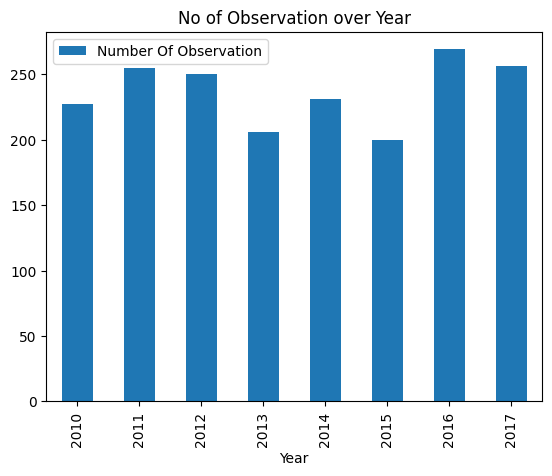

In [13]:
observations_df.plot(kind='bar',x='Year',y='Number Of Observation')
plt.title('No of Observation over Year')

## Region

In [14]:
# Create a dictionary to store region counts for each year
region_counts = {}
for year, df in zip(range(2010, 2018), datasets):
    region_count = df['Region'].value_counts().to_dict()
    region_counts[year] = region_count

# Create a DataFrame to store the region counts
Regions_df = pd.DataFrame(region_counts)

# Fill NaN values with 0 (if a region doesn't appear in a year's dataset)
Regions_df = Regions_df.fillna(0)

# Convert the values to integers
Regions_df = Regions_df.astype(int)

# Reset the index and rename the index column to 'Year'
Regions_df = Regions_df.reset_index().rename(columns={'index': 'Region'})


In [15]:
Regions_df

Region  2010  2011  2012  2013  2014  2015  2016  2017
0             Polonnaruwa    74     0    72    63    57    37    54    47
1           North Western    66    82    63    18    14    15     0     0
2                 Eastern    42    33    44    29    49    52    55    56
3                Southern    35    36    29    18    40    12    26    16
4             YalaBundala     8    11     4     0     0     0     0     0
5                 Central     2     3     5     7     8     5     5     4
6                Mahaweli     0    90     0     0     0     0     0     0
7            Anuradhapura     0     0    19    49    32    28    41    30
8                     Uva     0     0    14    22    16    13    14    25
9                Vavuniya     0     0     0     0    10    12    16    13
10            Kilinochchi     0     0     0     0     5     4     2     4
11            Trincomalee     0     0     0     0     0    22    30    22
12                Wayamba     0     0     0     0     0     0    16    15
13               Puttalam     0     0     0     0     0     0    10    17
14  Elephant Transit Home     0     0     0     0     0     0     0     7

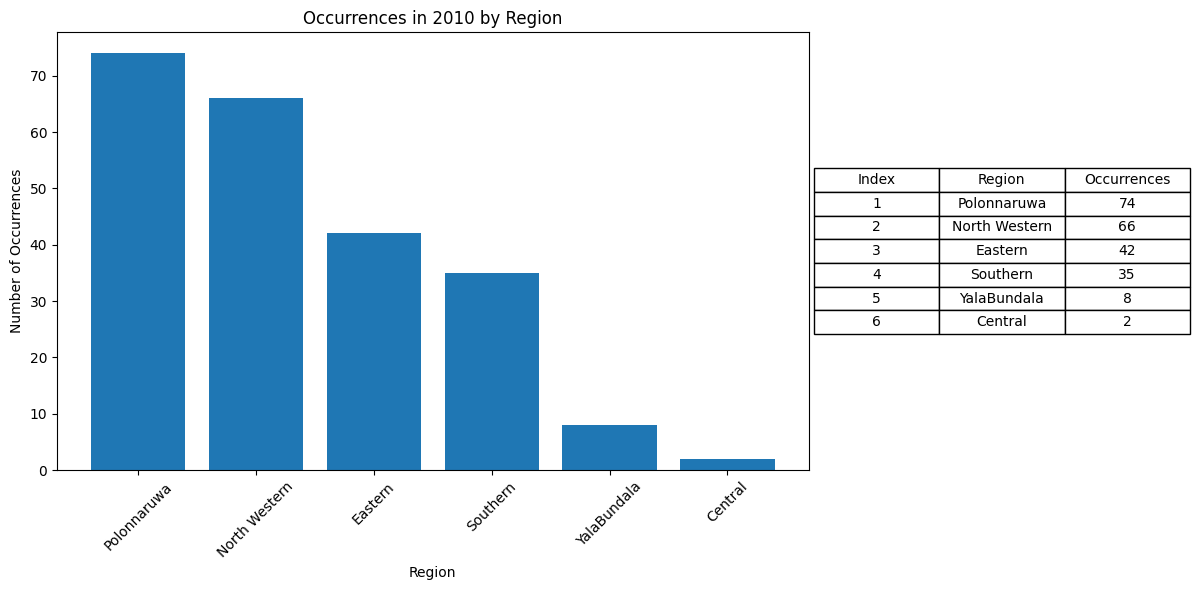

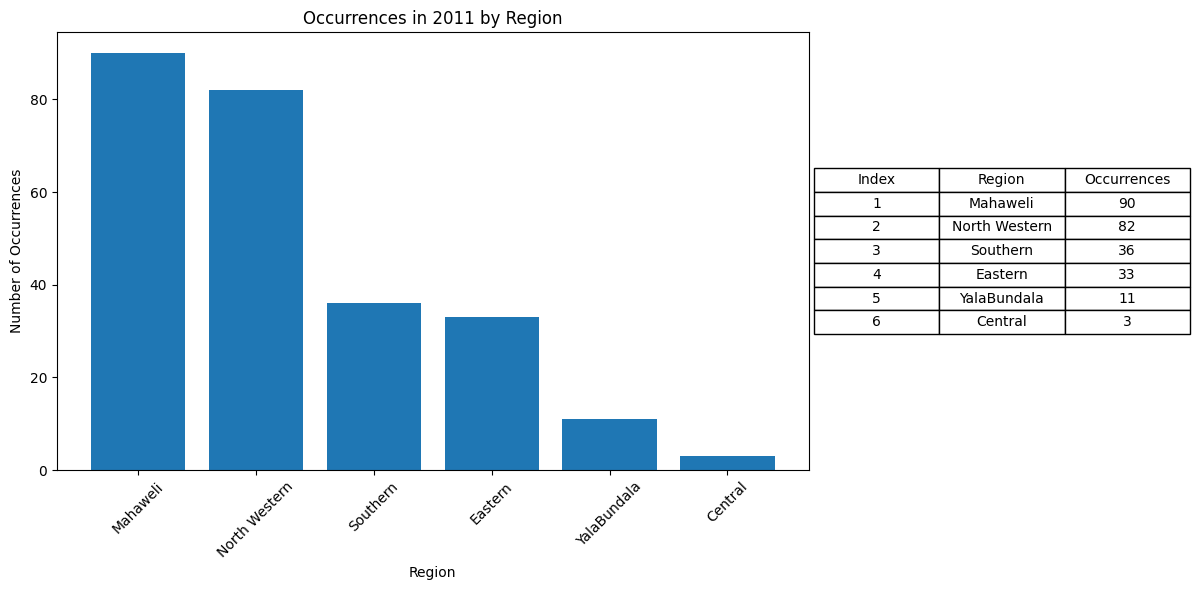

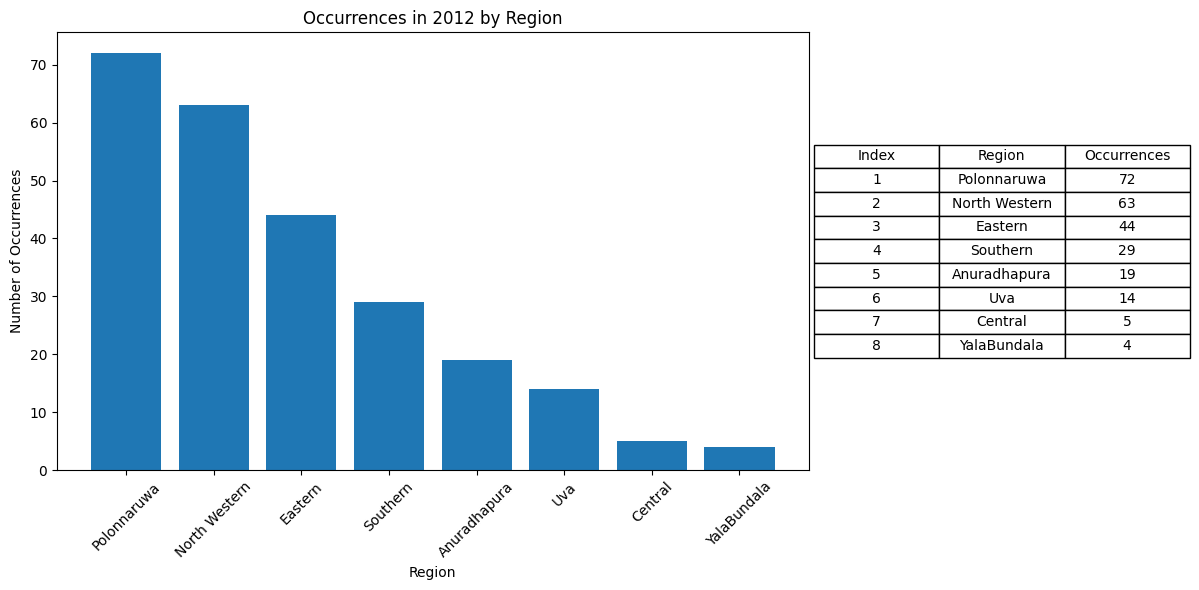

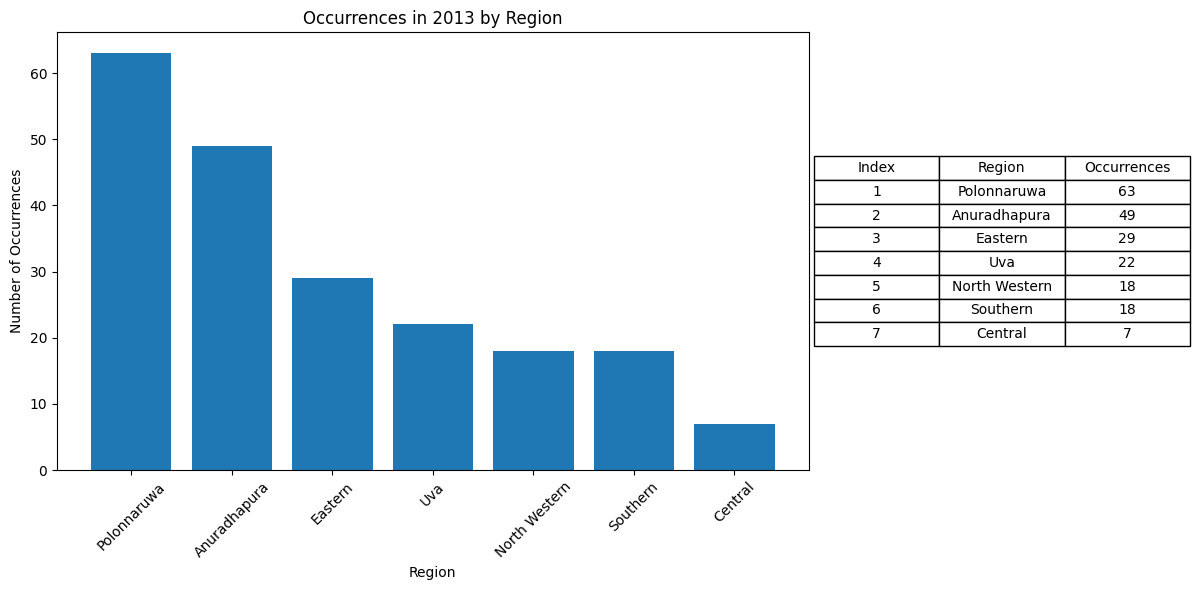

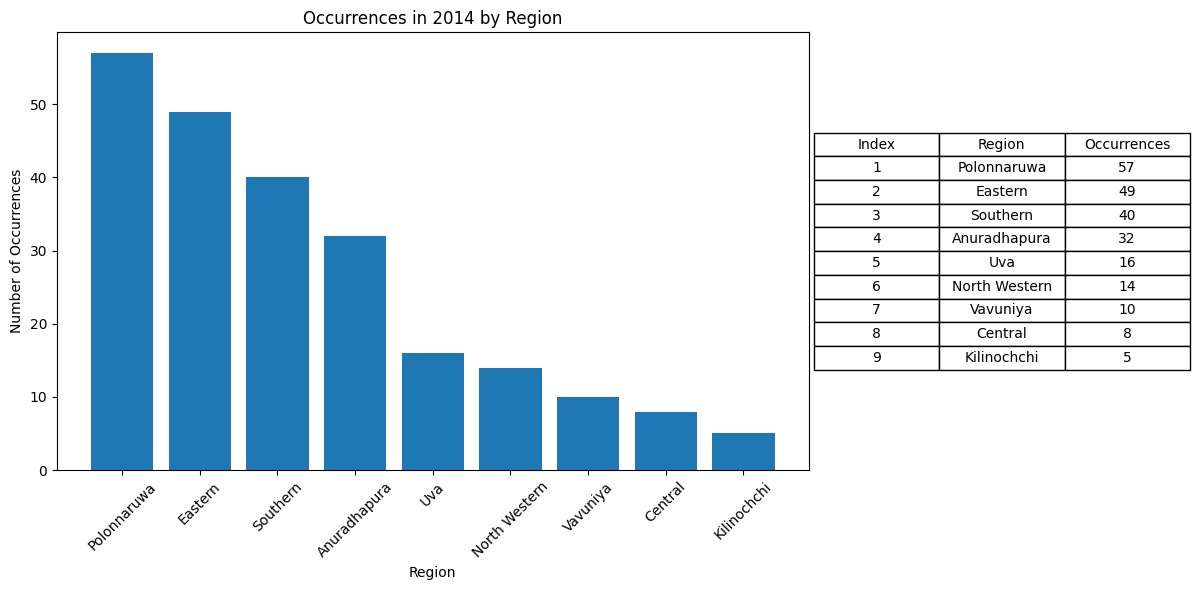

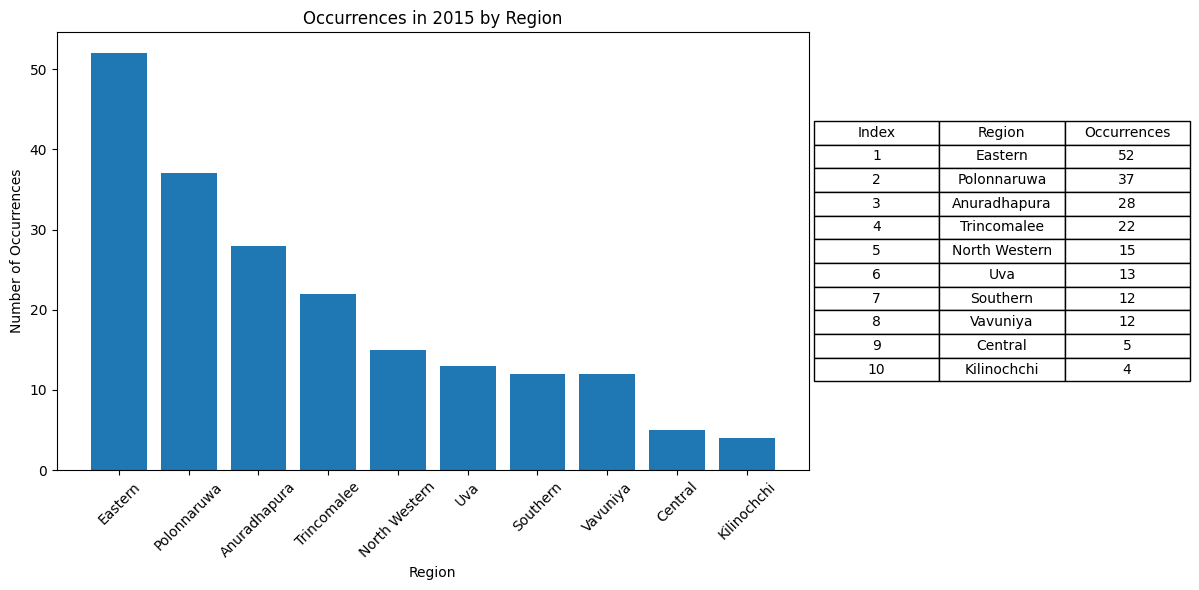

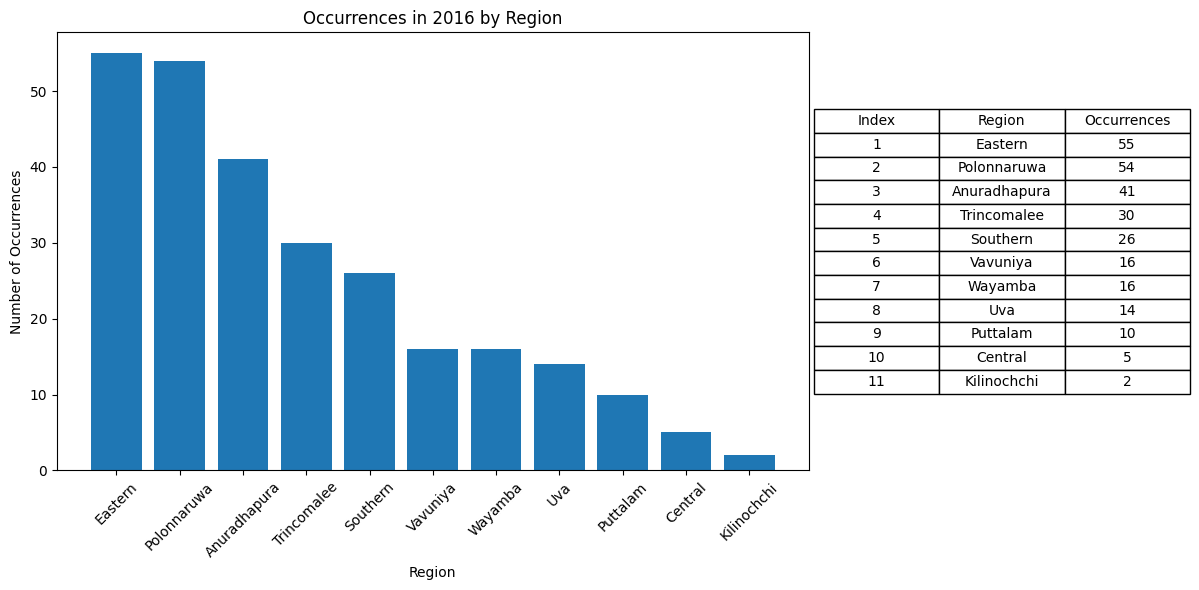

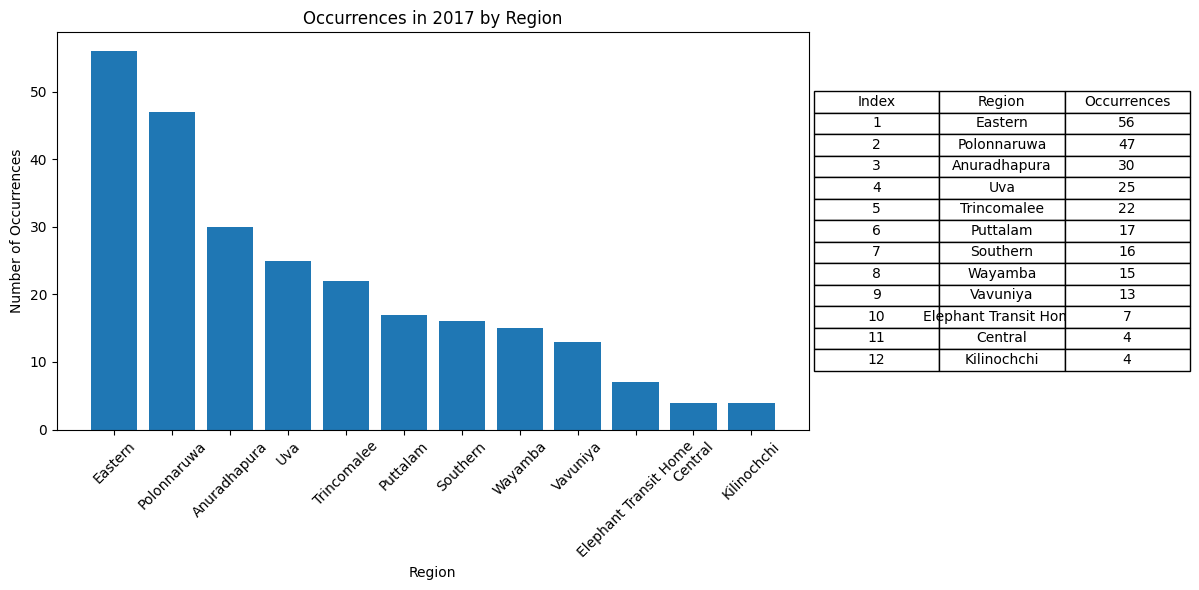

In [16]:
# Set 'Region' as index
regions_df = Regions_df.set_index('Region', inplace=False)

# Years to loop through
years = range(2010, 2018)

# Loop through each year
for year in years:
    plt.figure(figsize=(12, 6))
    
    # Filter out regions with occurrence 0 for the current year
    data_to_plot = regions_df[regions_df[year] > 0]
    
    # Create a grid with 1 row and 2 columns for the plot and table
    gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
    
    # Create the bar plot in the first cell of the grid
    plt.subplot(gs[0])
    descending_Region = data_to_plot[year].nlargest(len(data_to_plot))
    plt.bar(descending_Region.index, descending_Region)
    plt.xlabel('Region')
    plt.ylabel('Number of Occurrences')
    plt.title(f'Occurrences in {year} by Region')
    plt.xticks(rotation=45)
    
    # Create the table as a separate subplot in the second cell of the grid
    table_ax = plt.subplot(gs[1])
    top_regions = data_to_plot[year].nlargest(len(data_to_plot))  # Get regions in ascending order
    table_data = [['Index', 'Region', 'Occurrences']] + [[i + 1, r, c] for i, (r, c) in enumerate(zip(top_regions.index, top_regions))]
    col_labels = table_data.pop(0)
    table = table_ax.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.5, 1.5)  # Adjust the table size
    table_ax.axis('off')

    plt.tight_layout()
    plt.show()


In [17]:
Regions_df = Regions_df.transpose().reset_index()

# Set the first row as column headers
Regions_df.columns = Regions_df.iloc[0]

# Drop the first row
Regions_df = Regions_df[1:]

In [18]:
Regions_df

0 Region Polonnaruwa North Western Eastern Southern YalaBundala Central  \
1   2010          74            66      42       35           8       2   
2   2011           0            82      33       36          11       3   
3   2012          72            63      44       29           4       5   
4   2013          63            18      29       18           0       7   
5   2014          57            14      49       40           0       8   
6   2015          37            15      52       12           0       5   
7   2016          54             0      55       26           0       5   
8   2017          47             0      56       16           0       4   

0 Mahaweli Anuradhapura Uva Vavuniya Kilinochchi Trincomalee Wayamba Puttalam  \
1        0            0   0        0           0           0       0        0   
2       90            0   0        0           0           0       0        0   
3        0           19  14        0           0           0       0        0   
4        0           49  22        0           0           0       0        0   
5        0           32  16       10           5           0       0        0   
6        0           28  13       12           4          22       0        0   
7        0           41  14       16           2          30      16       10   
8        0           30  25       13           4          22      15       17   

0 Elephant Transit Home  
1                     0  
2                     0  
3                     0  
4                     0  
5                     0  
6                     0  
7                     0  
8                     7

<Figure size 1000x600 with 0 Axes>

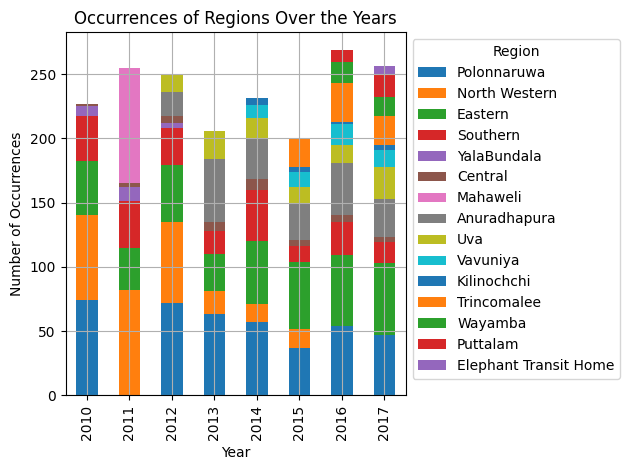

In [19]:
import matplotlib.pyplot as plt
# Set 'Year' as index
Regions_df.set_index('Region', inplace=True)

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
ax = Regions_df.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Regions Over the Years')

# Move the legend outside the plot to the right
ax.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.grid(True)
plt.tight_layout()  # Ensures the legend fits within the plot area
plt.show()

## District

In [20]:
# Create a dictionary to store District counts for each year
District_counts = {}
for year, df in zip(range(2010, 2018), datasets):
    District_count = df['District'].value_counts().to_dict()
    District_counts[year] = District_count

# Create a DataFrame to store the District counts
District_df = pd.DataFrame(District_counts)

# Fill NaN values with 0 (if a region doesn't appear in a year's dataset)
District_df = District_df.fillna(0)

# Convert the values to integers
District_df = District_df.astype(int)

# Reset the index and rename the index column to 'Year'
District_df = District_df.reset_index().rename(columns={'index': 'District'})

In [21]:
District_df

District  2010  2011  2012  2013  2014  2015  2016  2017
0   Anuradhapura    36    43    29    39    27    30    44    33
1         Ampara    34    23    33    22    39    36    37    34
2    Polonnaruwa    33    43    28    32    24    32    44    43
3    Trincomalee    28    34    30    31    21    22    30    21
4     Monaragala    26    18    27    23    25    20    29    29
5     Hambantota    17    15    12    12    15     5     5    10
6     Kurunegala    10    15    17    12    10    10    13    12
7         Matale     7     6     3     0     7     6    10     5
8         Mannar     7     4     6     2    10     2     8     5
9        Badulla     7     6     5     2     5     6     6    12
10    Batticaloa     7    11    14     4    13    13    17    12
11      Puttalam     6    12    17     6     7     5    10    18
12     Ratnapura     3    16    11     7    16     0     4    10
13      Vavuniya     3     6    13     7     2     8     7     8
14       Unknown     2     0     0     0     0     0     0     0
15         Kandy     1     1     2     4     1     1     2     0
16   Kilinochchi     0     1     0     0     0     0     1     1
17    Mullaitivu     0     1     1     1     5     4     2     3
18  Nuwara Eliya     0     0     2     2     4     0     0     0

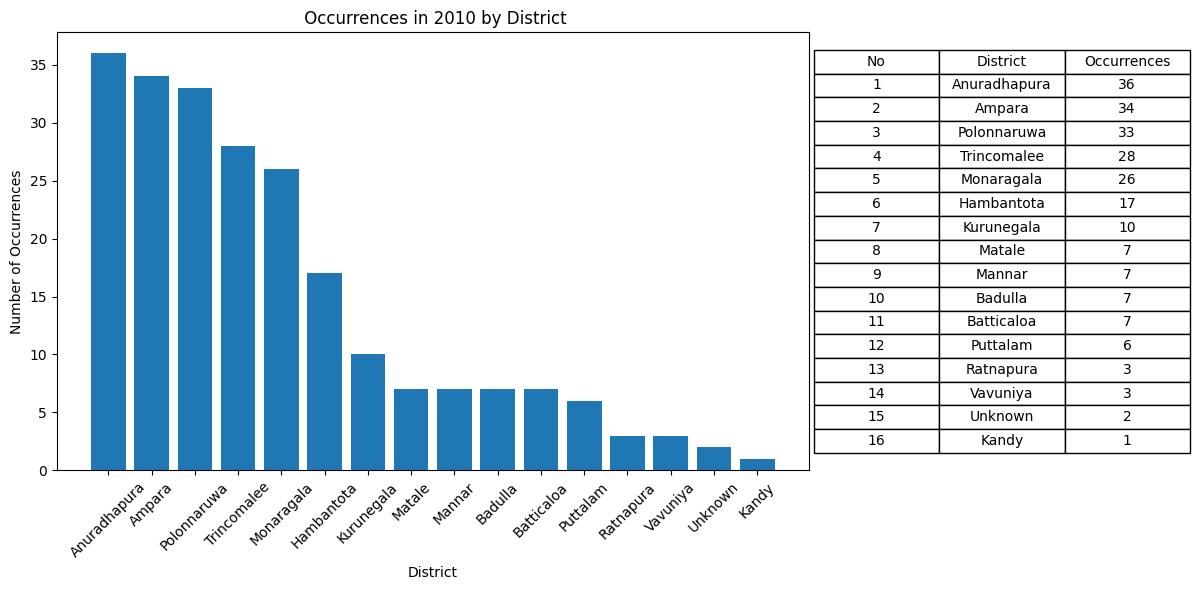

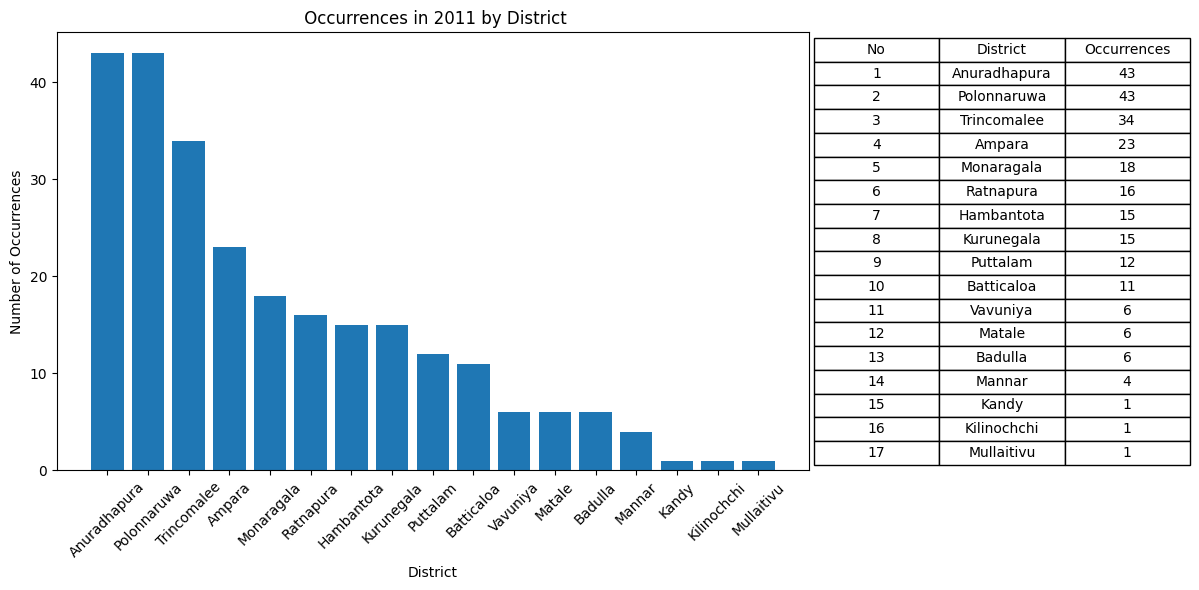

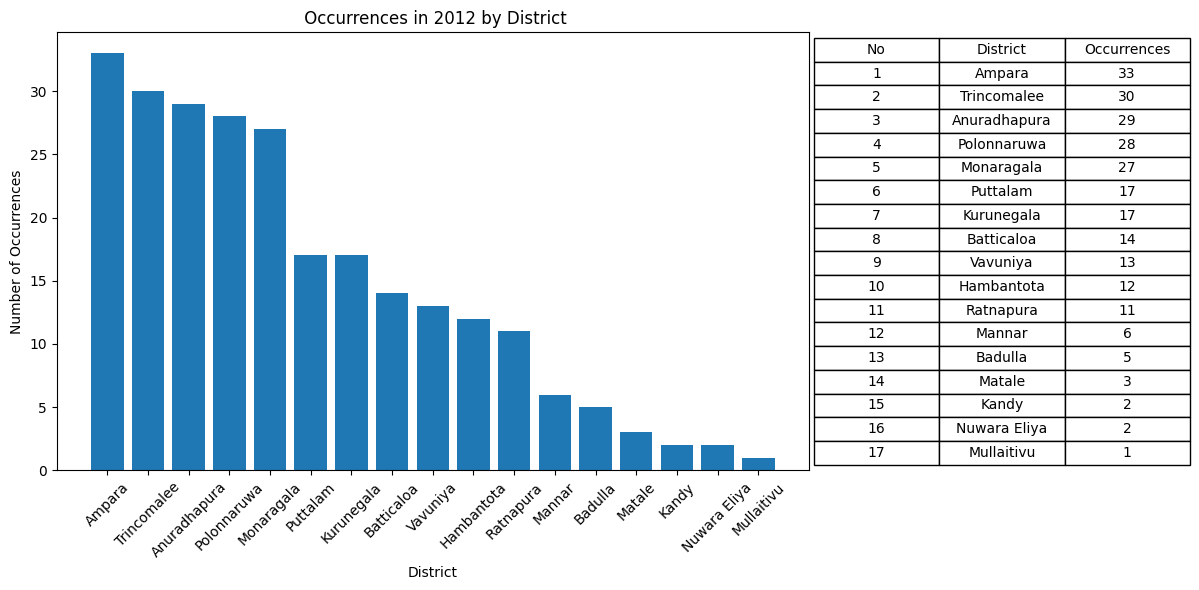

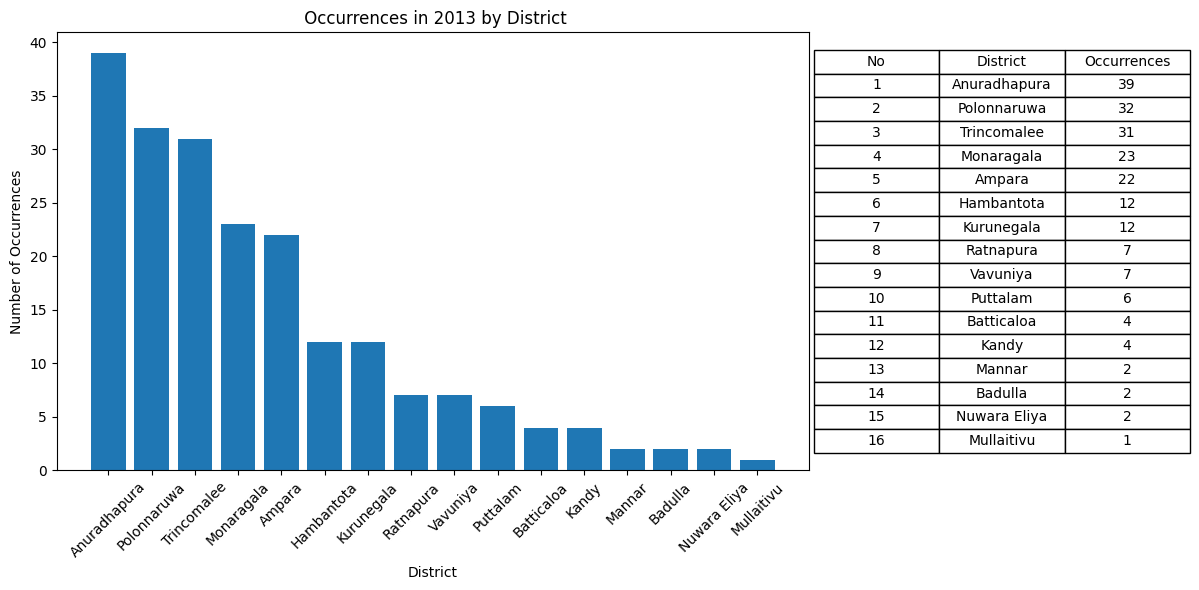

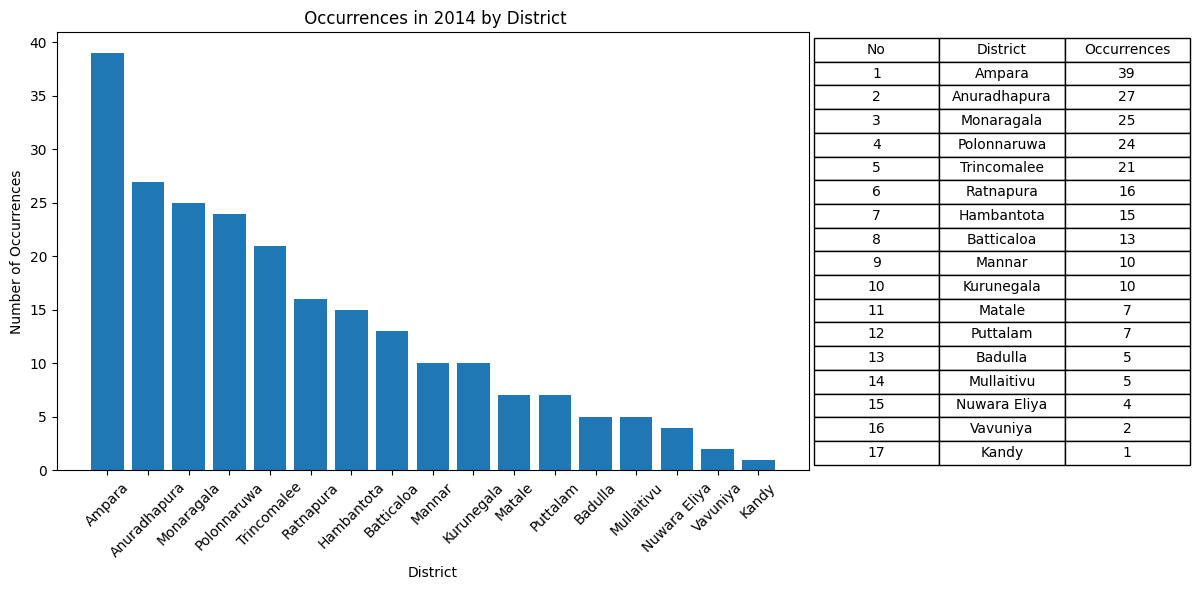

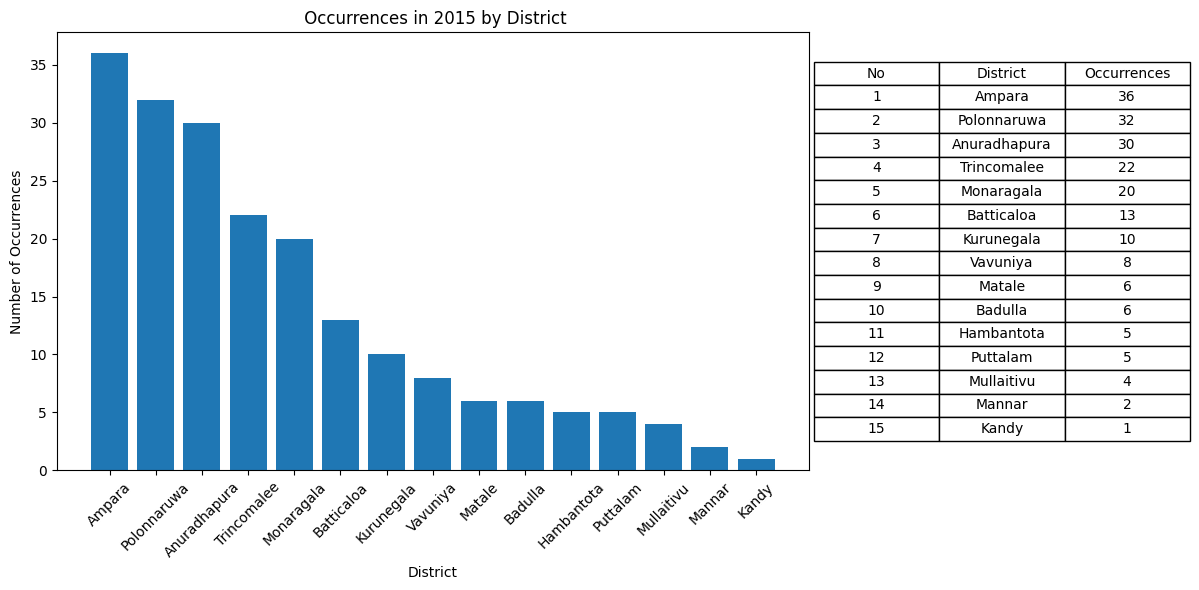

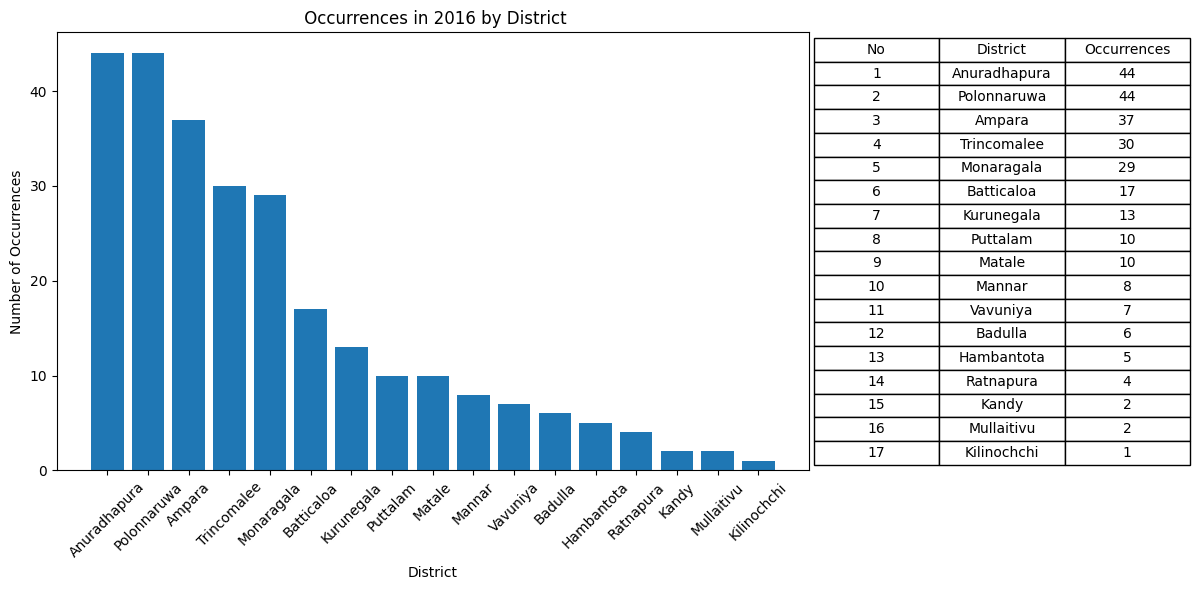

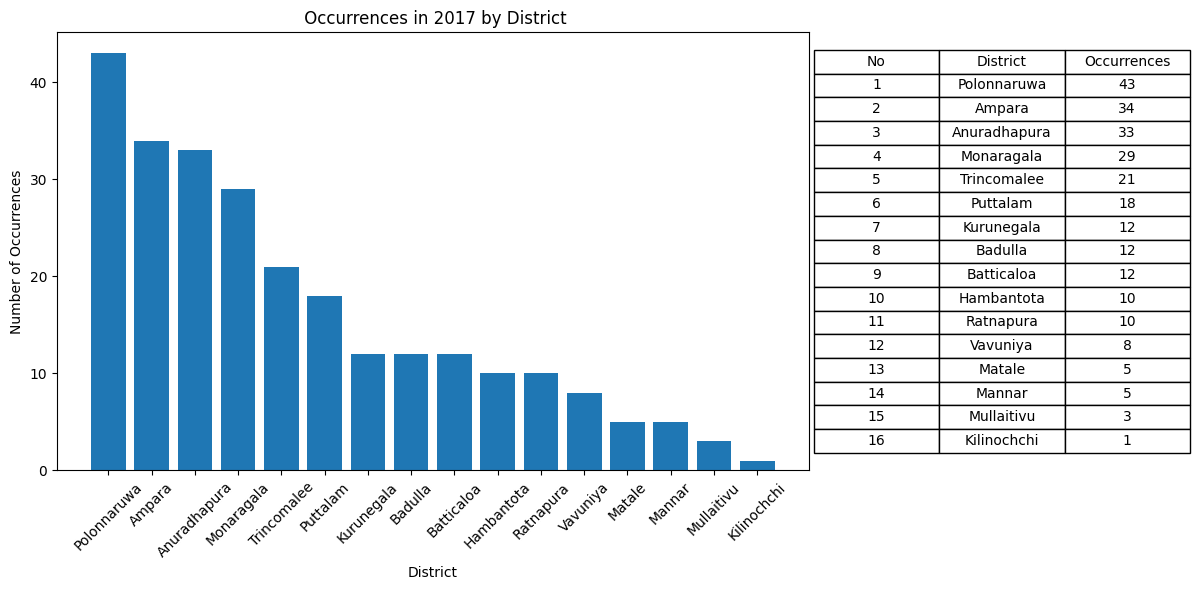

In [22]:
# Set 'District' as index
districts_df = District_df.set_index('District', inplace=False)

# Years to loop through
years = range(2010, 2018)

# Loop through each year
for year in years:
    plt.figure(figsize=(12, 6))
    
    # Filter out districts with occurrence 0 for the current year
    data_to_plot = districts_df[districts_df[year] > 0]
    
    # Create a grid with 1 row and 2 columns for the plot and table
    gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
    
    # Create the descending bar plot in the second cell of the grid

    plt.subplot(gs[0])
    descending_districts = data_to_plot[year].nlargest(len(data_to_plot))
    plt.bar(descending_districts.index, descending_districts)
    plt.xlabel('District')
    plt.ylabel('Number of Occurrences')
    plt.title(f' Occurrences in {year} by District')
    plt.xticks(rotation=45)
    
    # Create the table as a separate subplot in the second cell of the grid
    table_ax = plt.subplot(gs[1])
    top_districts = data_to_plot[year].nlargest(len(data_to_plot))  # Get districts in ascending order
    table_data = [['No', 'District', 'Occurrences']] + [[i + 1, r, c] for i, (r, c) in enumerate(zip(top_districts.index, top_districts))]
    col_labels = table_data.pop(0)
    table = table_ax.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.5, 1.5)  # Adjust the table size
    table_ax.axis('off')

    plt.tight_layout()
    plt.show()


In [23]:
District_df = District_df.transpose().reset_index()

# Set the first row as column headers
District_df.columns = District_df.iloc[0]

# Drop the first row
District_df = District_df[1:]

<Figure size 3000x1800 with 0 Axes>

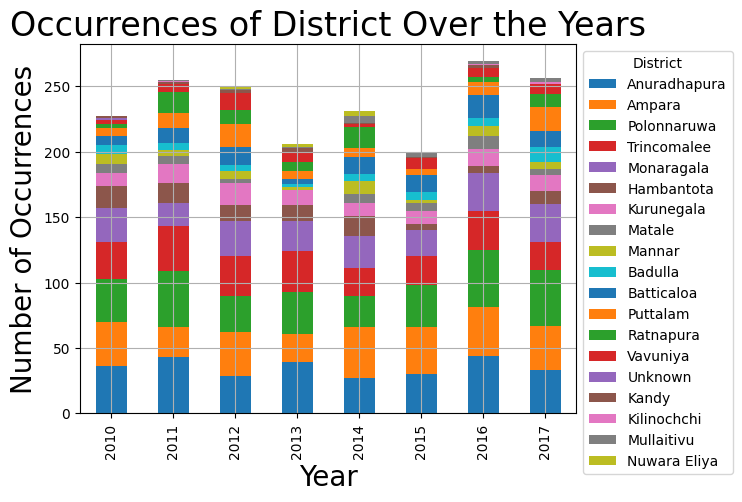

In [24]:
# Set 'District' as index
District_df.set_index('District', inplace=True)

# Create a stacked bar plot
plt.figure(figsize=(30, 18))
ax = District_df.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.title('Occurrences of District Over the Years', fontsize=24)

# Move the legend outside the plot to the right
ax.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.grid(True)
#plt.tight_layout()  # Ensures the legend fits within the plot area
plt.show()

## D/S Office

In [25]:
# Create a dictionary to store D/S Office counts for each year
DS_counts = {}
for year, df in zip(range(2010, 2018), datasets):
    DS_count = df['D/S Office'].value_counts().to_dict()
    DS_counts[year] = DS_count

# Create a DataFrame to store the region counts
DS_df = pd.DataFrame(DS_counts)

# Fill NaN values with 0 (if a region doesn't appear in a year's dataset)
DS_df = DS_df.fillna(0)

# Convert the values to integers
DS_df = DS_df.astype(int)

# Reset the index and rename the index column to 'Year'
DS_df = DS_df.reset_index().rename(columns={'index': 'D/S Office'})

In [26]:
DS_df

D/S Office  2010  2011  2012  2013  2014  2015  2016  2017
0           Hinguraggoda    16    10     7     6     3     0     0     0
1           Thanamalvila    11     7     4     3    10     6     0     0
2               Kanthale    10     9     6     8     3     1     4     5
3            Hambanthota     8     0     5     0    11     1     0     0
4               Morawewa     7     9     8     5     3     3     9     2
..                   ...   ...   ...   ...   ...   ...   ...   ...   ...
246           Nedunkanar     0     0     0     0     0     0     0     1
247  Nagara Ha Kadavatha     0     0     0     0     0     0     0     1
248             Siripura     0     0     0     0     0     0     0     1
249             Seruvila     0     0     0     0     0     0     0     1
250                Mutur     0     0     0     0     0     0     0     1

[251 rows x 9 columns]

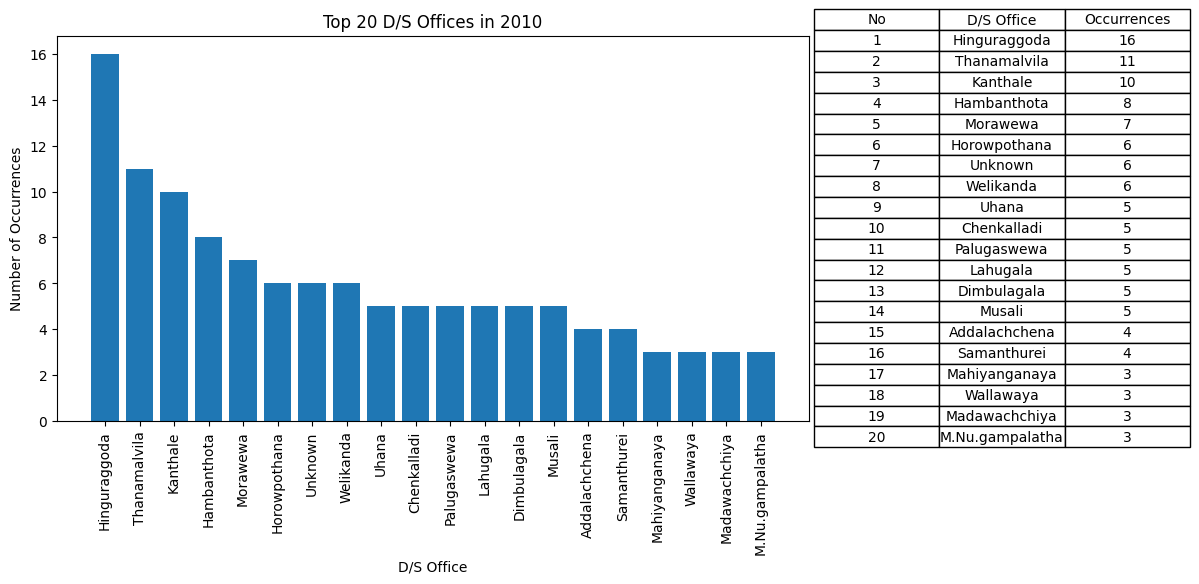

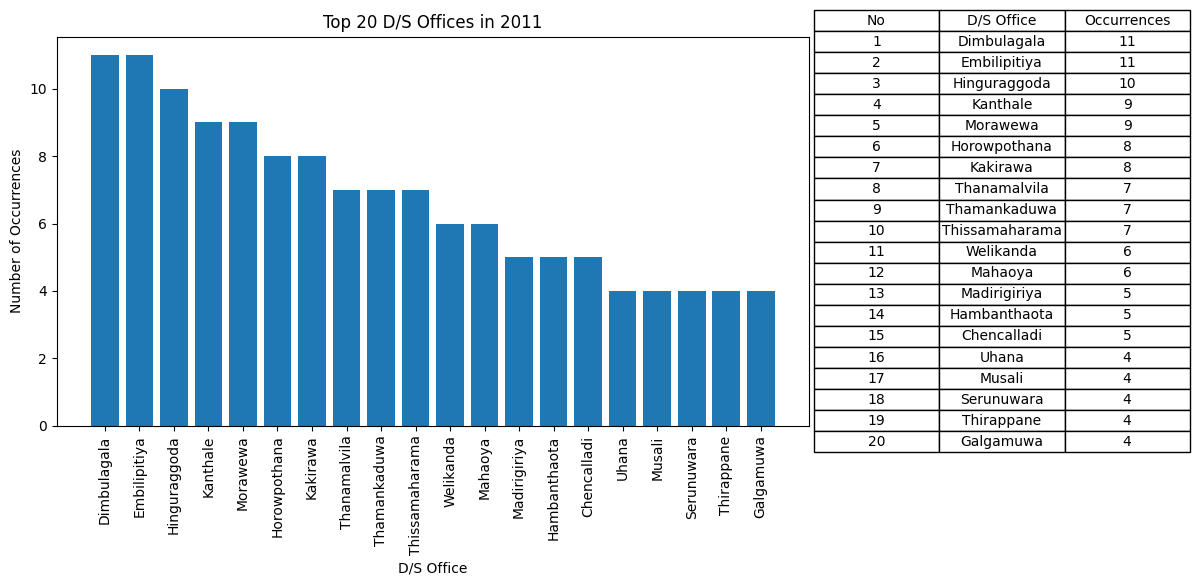

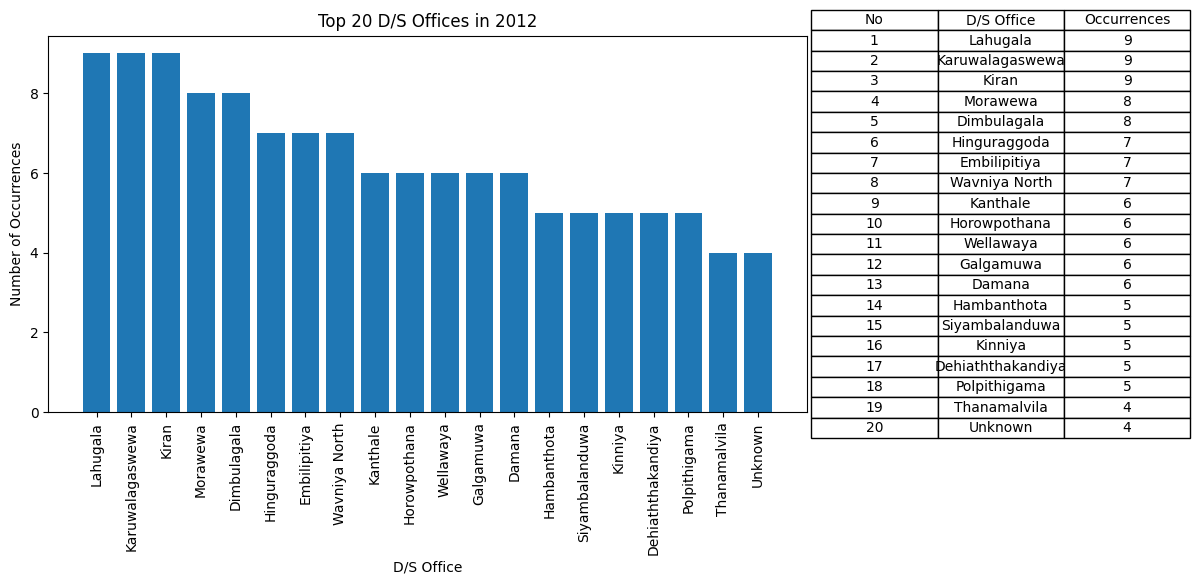

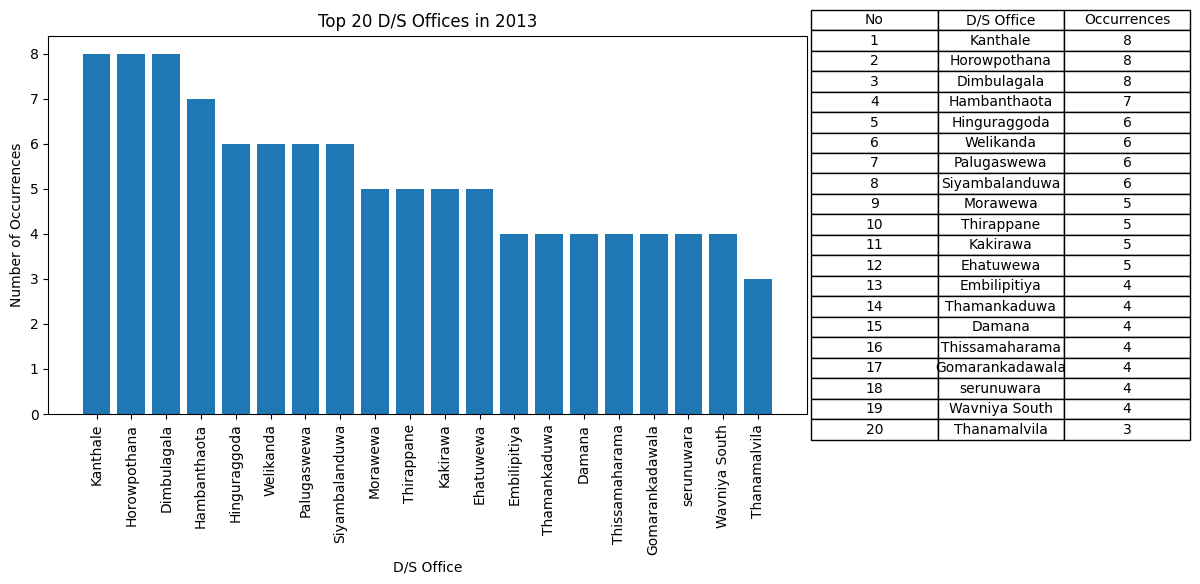

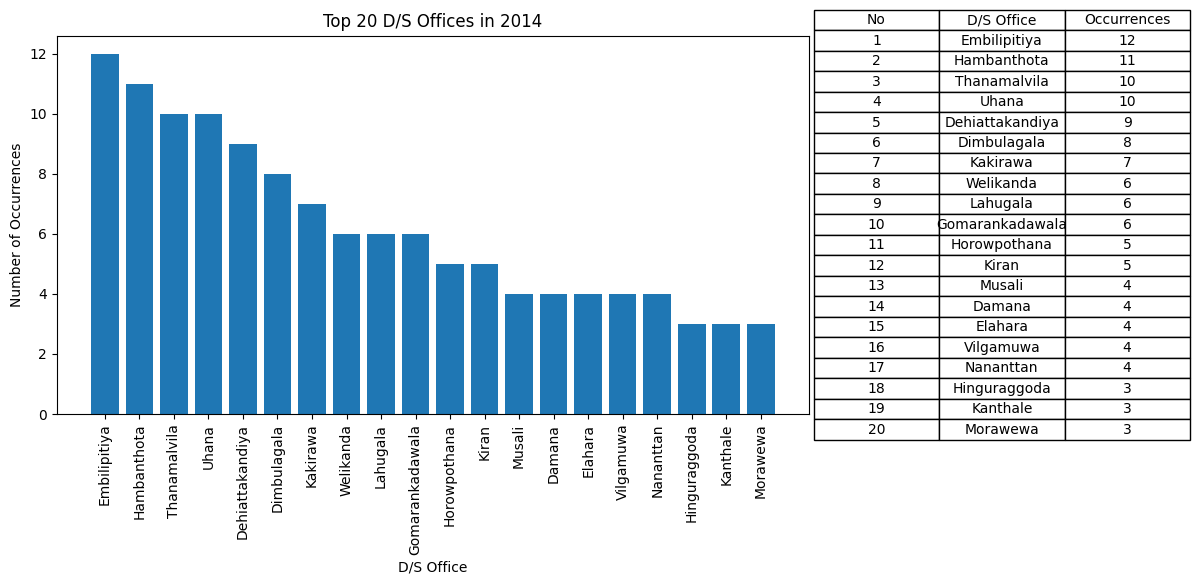

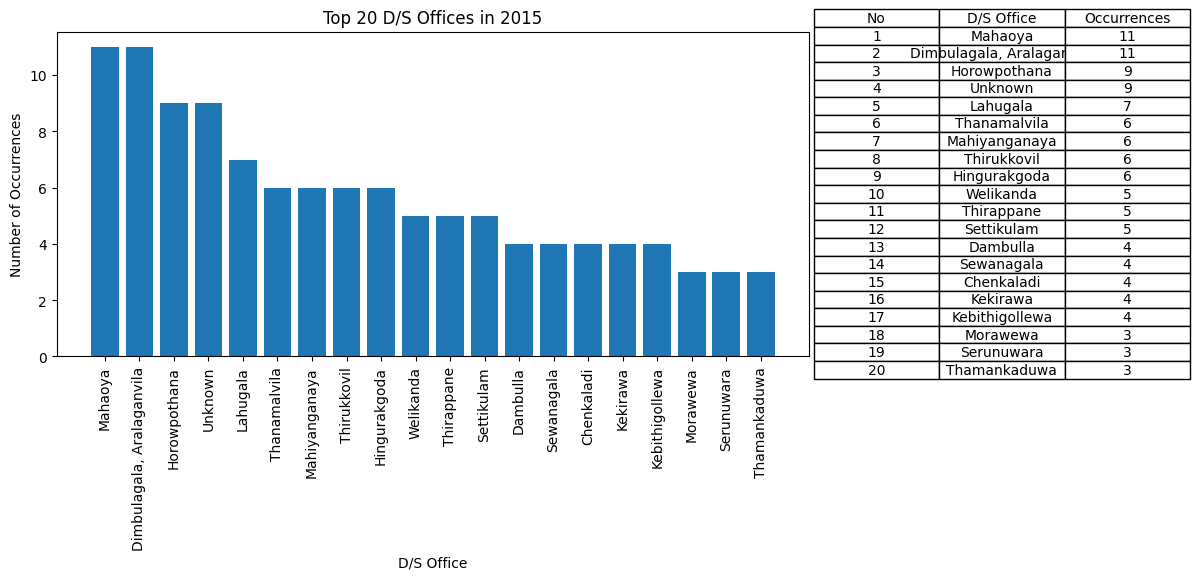

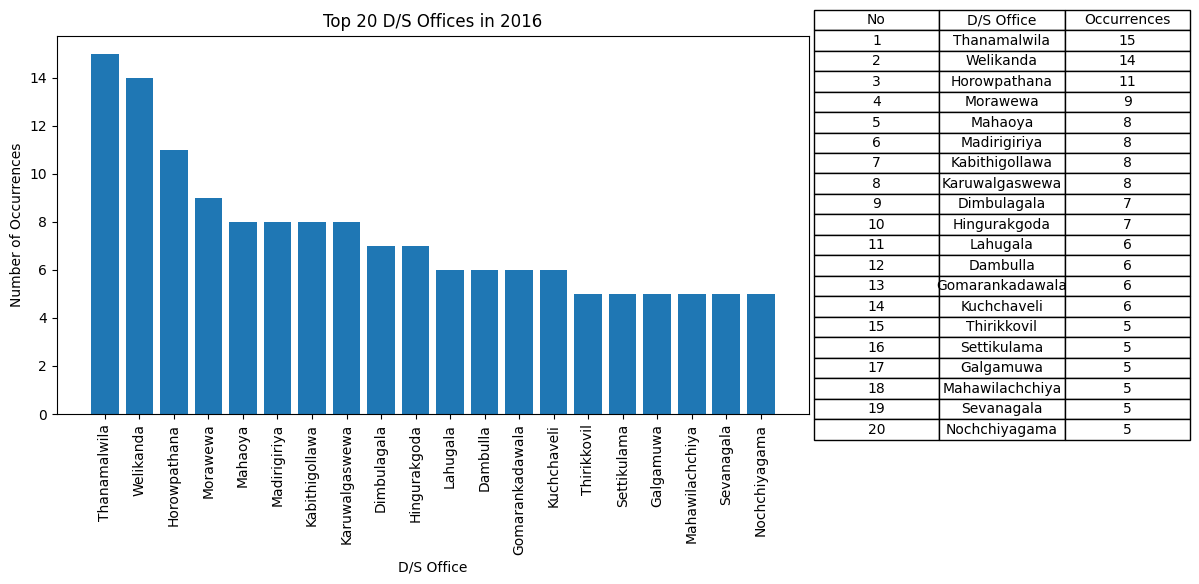

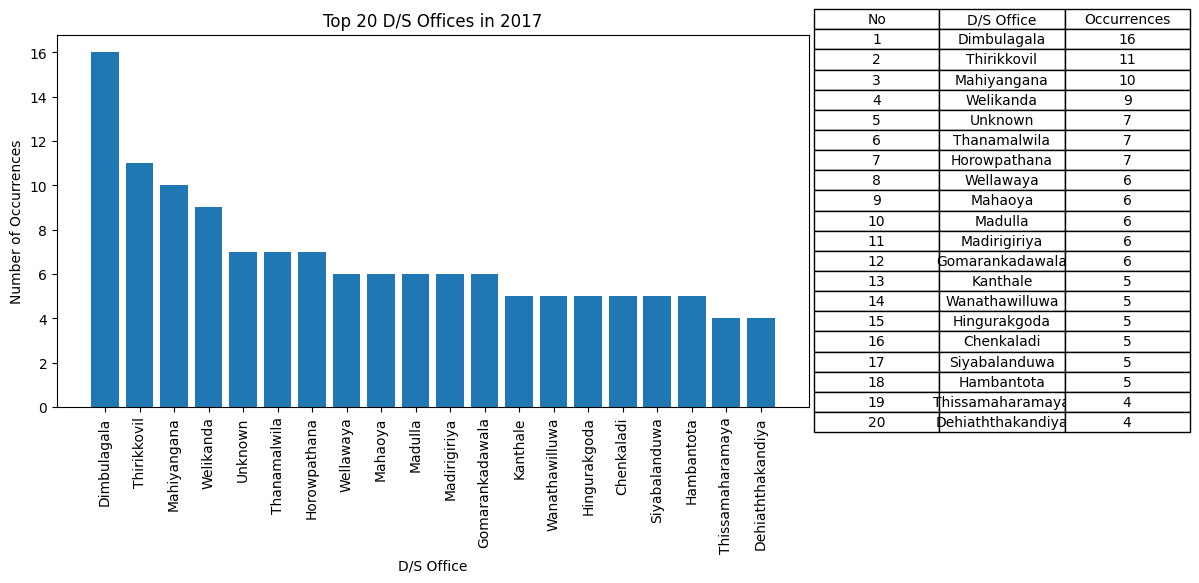

In [27]:
# Set 'D/S Office' as index
ds = DS_df.set_index('D/S Office', inplace=False)

# Years to loop through
years = range(2010, 2018)

# Number of top D/S Offices to show
top_n = 20

# Loop through each year
for year in years:
    plt.figure(figsize=(12, 6))
    
    # Filter out D/S Offices with occurrence 0 for the current year
    data_to_plot = ds[ds[year] > 0]
    
    # Get the top N D/S Offices in ascending order
    top_ds_offices = data_to_plot[year].nlargest(top_n)
    
    # Create a grid with 1 row and 2 columns for the plot and table
    gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
    
    # Create the bar plot in the first cell of the grid
    plt.subplot(gs[0])
    plt.bar(top_ds_offices.index, top_ds_offices)
    plt.xlabel('D/S Office')
    plt.ylabel('Number of Occurrences')
    plt.title(f'Top {top_n} D/S Offices in {year}')
    plt.xticks(rotation=90)
    
    # Create the table as a separate subplot in the second cell of the grid
    table_ax = plt.subplot(gs[1])
    table_data = [['No', 'D/S Office', 'Occurrences']] + [[i + 1, r, c] for i, (r, c) in enumerate(zip(top_ds_offices.index, top_ds_offices))]
    col_labels = table_data.pop(0)
    table = table_ax.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.5, 1.5)  # Adjust the table size
    table_ax.axis('off')

    plt.tight_layout()
    plt.show()


In [28]:
DS_df = DS_df.transpose().reset_index()

# Set the first row as column headers
DS_df.columns = DS_df.iloc[0]

# Drop the first row
DS_df = DS_df[1:]

<Figure size 3000x1800 with 0 Axes>

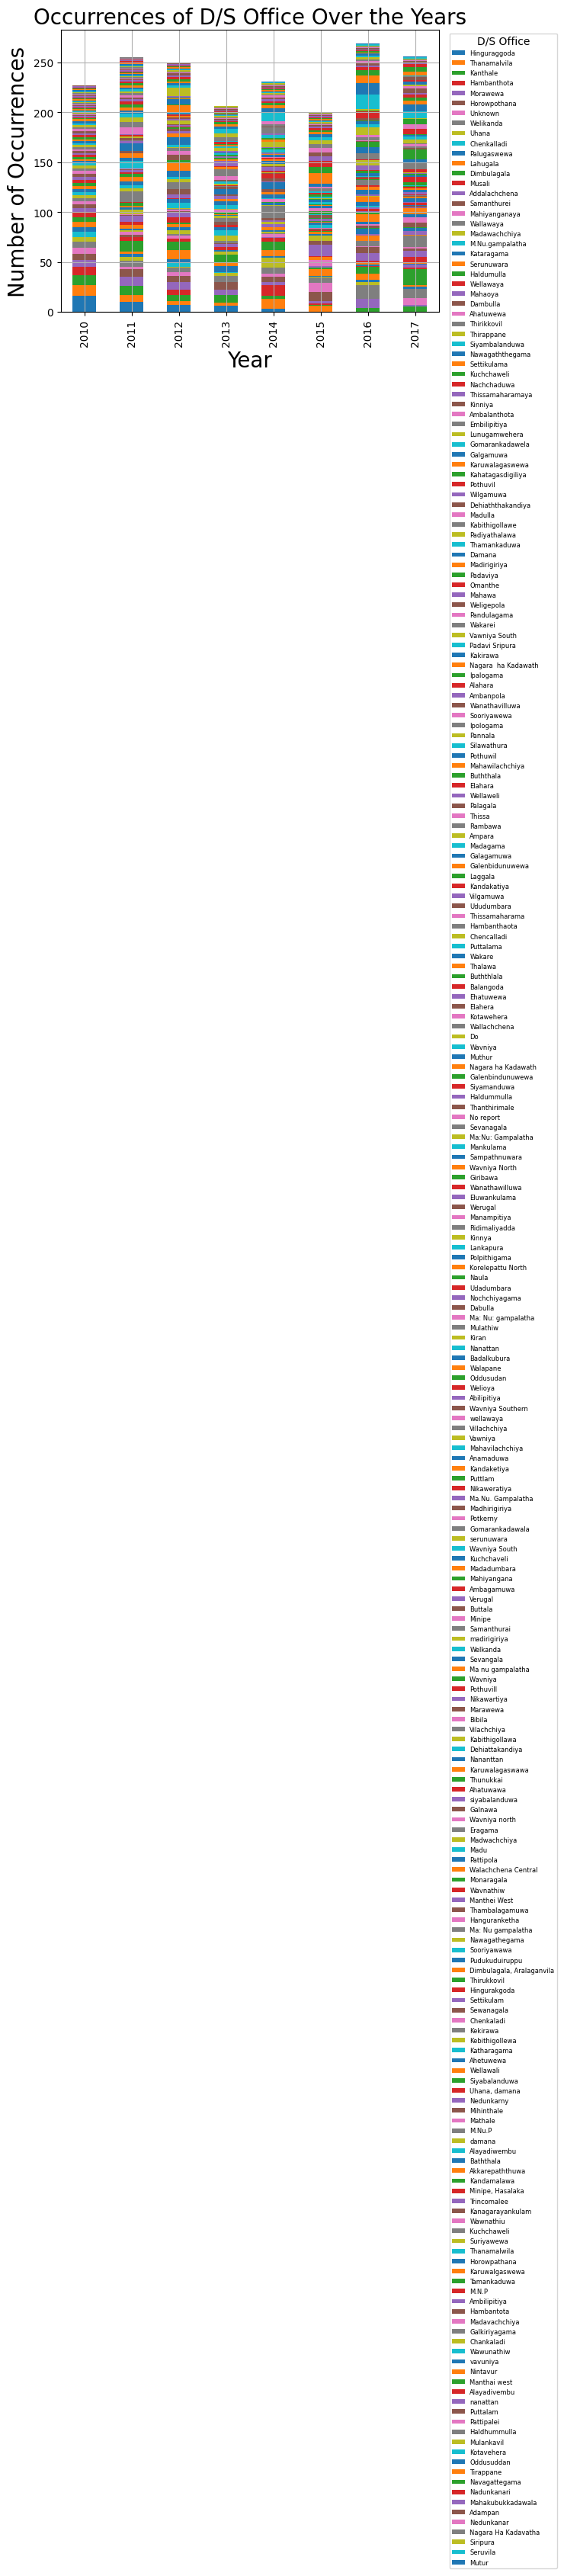

In [29]:
# Set 'D/S Office' as index
DS_df.set_index('D/S Office', inplace=True)

# Create a stacked bar plot
plt.figure(figsize=(30, 18))
ax = DS_df.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.title('Occurrences of D/S Office Over the Years', fontsize=20)

# Move the legend outside the plot to the right
ax.legend(title='D/S Office', loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=6)

# Display the plot
plt.grid(True)
#plt.tight_layout()  # Ensures the legend fits within the plot area
plt.show()

## Cause of Death

In [30]:
# Create a dictionary to store Cause of Death counts for each year
COD_counts = {}
for year, df in zip(range(2010, 2018), datasets):
    COD_count = df['Cause of Death'].value_counts().to_dict()
    COD_counts[year] = COD_count

# Create a DataFrame to store the Cause of Death counts
COD_df = pd.DataFrame(COD_counts)

# Fill NaN values with 0 (if a region doesn't appear in a year's dataset)
COD_df = COD_df.fillna(0)

# Convert the values to integers
COD_df = COD_df.astype(int)

# Reset the index and rename the index column to 'Year'
COD_df = COD_df.reset_index().rename(columns={'index': 'Cause of Death'})

In [31]:
COD_df

Cause of Death  2010  2011  2012  2013  2014  2015  2016  2017
0                 Gunshot    84    55    45    34    47    43    42    53
1                 Unknown    48    73    78    53    53    42    65    44
2            Electrocuted    18    18    21    26    12    20    29    25
3                Accident    18    12    17    10    10     3     3     4
4                   Other    17    10    11     9     6     0     8     6
5              Hakkapatas    11    33    36    34    41    50    41    53
6                 Poisned     9    16     8     7     9     8     7     7
7          Body destroyed     7     4     0     5    11     0     8     5
8          Train Accident     7    12    10     7     9    12    12     7
9                 Natural     4     9    11    11    25    12     5    10
10             Septicemia     2     0     2     3     1     1     3     1
11                Injured     1     3     4     5     4     6    12    10
12              Land mine     1     3     5     0     0     0     1     0
13                  Flood     0     6     0     0     0     0     0     0
14      Broken the Spinal     0     1     0     0     0     0     1     1
15                Drought     0     0     1     0     0     0     0     0
16             Nivukeniya     0     0     1     0     0     0     0     0
17      Severe hemorrhage     0     0     0     1     0     0     0     0
18            Liver floot     0     0     0     1     0     0     0     0
19    Garbage consumption     0     0     0     0     1     0     0     0
20                At born     0     0     0     0     1     0     0     2
21                Drowned     0     0     0     0     1     0     3     2
22  Attack by an elephant     0     0     0     0     0     2     2     6
23       Fallen into well     0     0     0     0     0     1     5     9
24                Disease     0     0     0     0     0     0    16     5
25              Lightning     0     0     0     0     0     0     4     0
26        Eaten polythene     0     0     0     0     0     0     2     4
27  Falling of a mountain     0     0     0     0     0     0     0     2

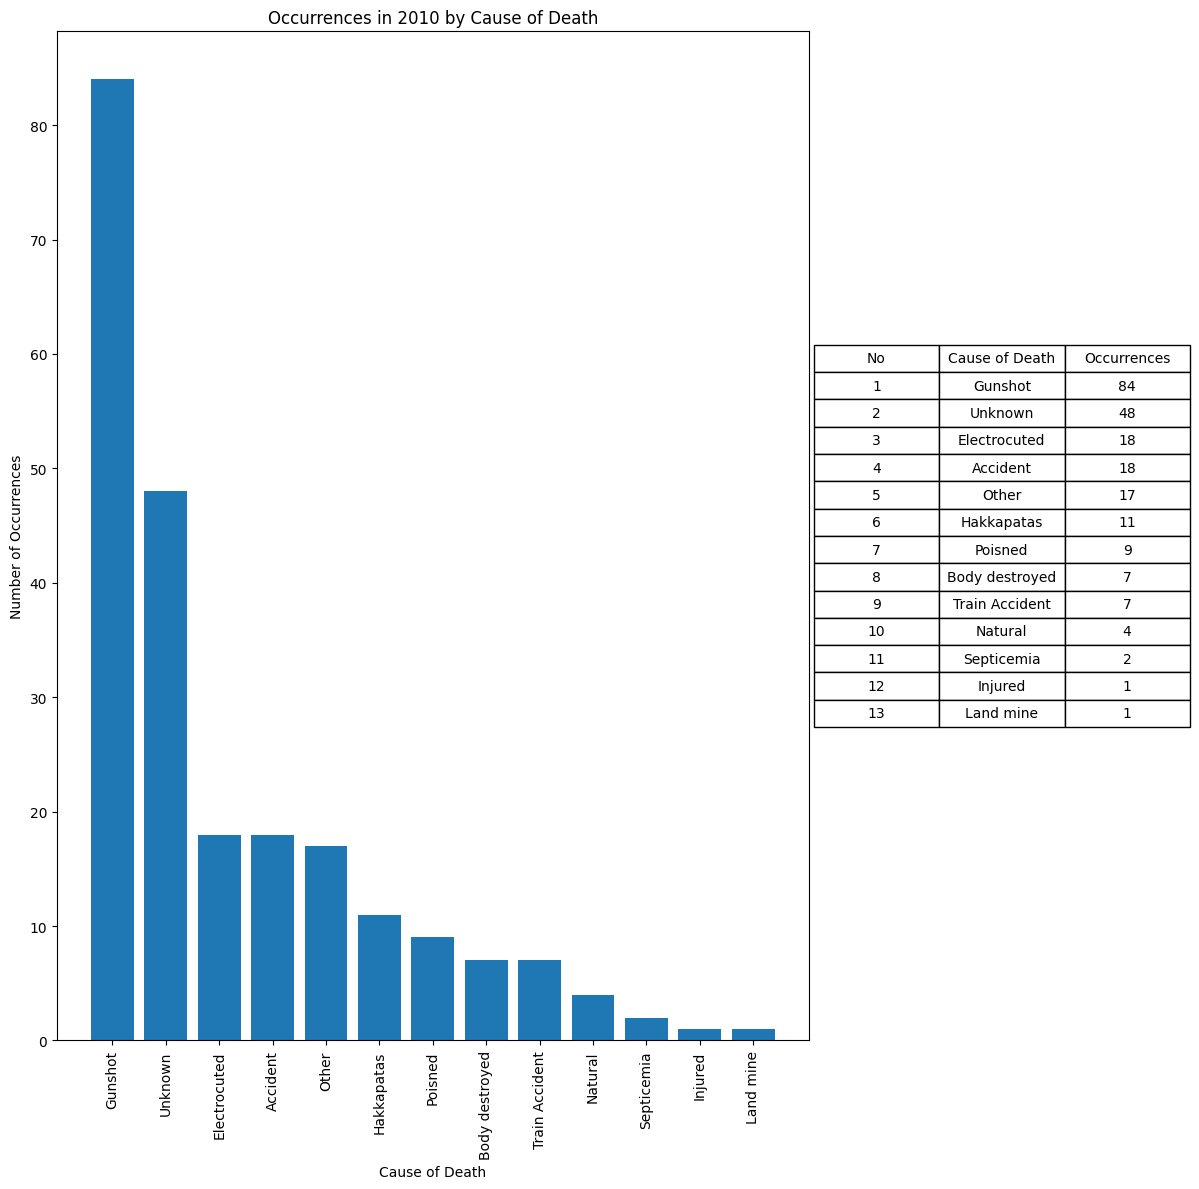

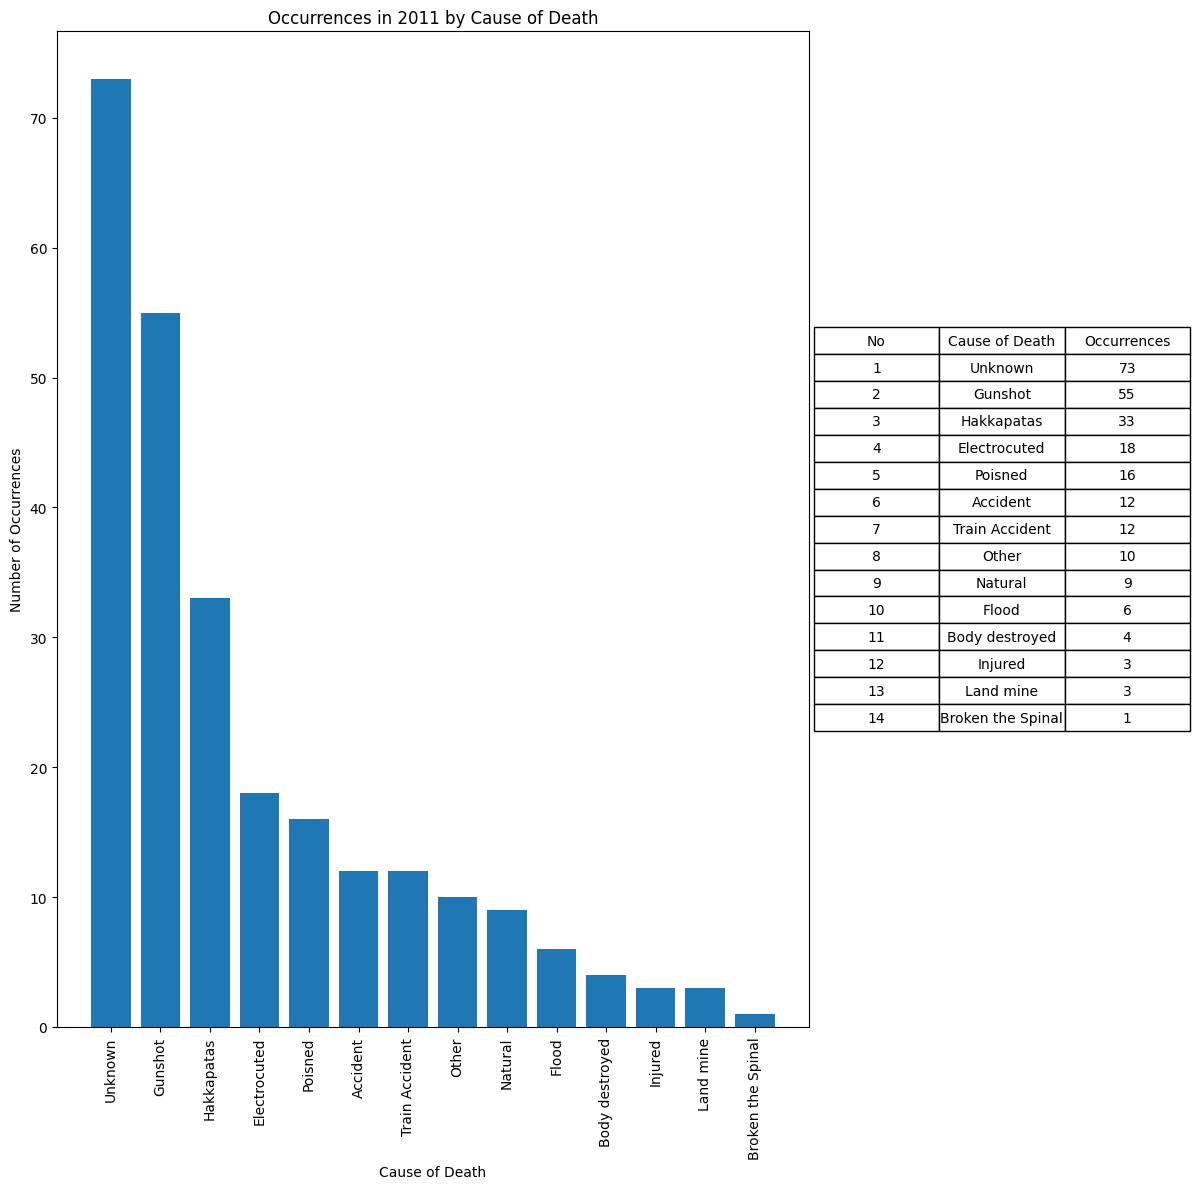

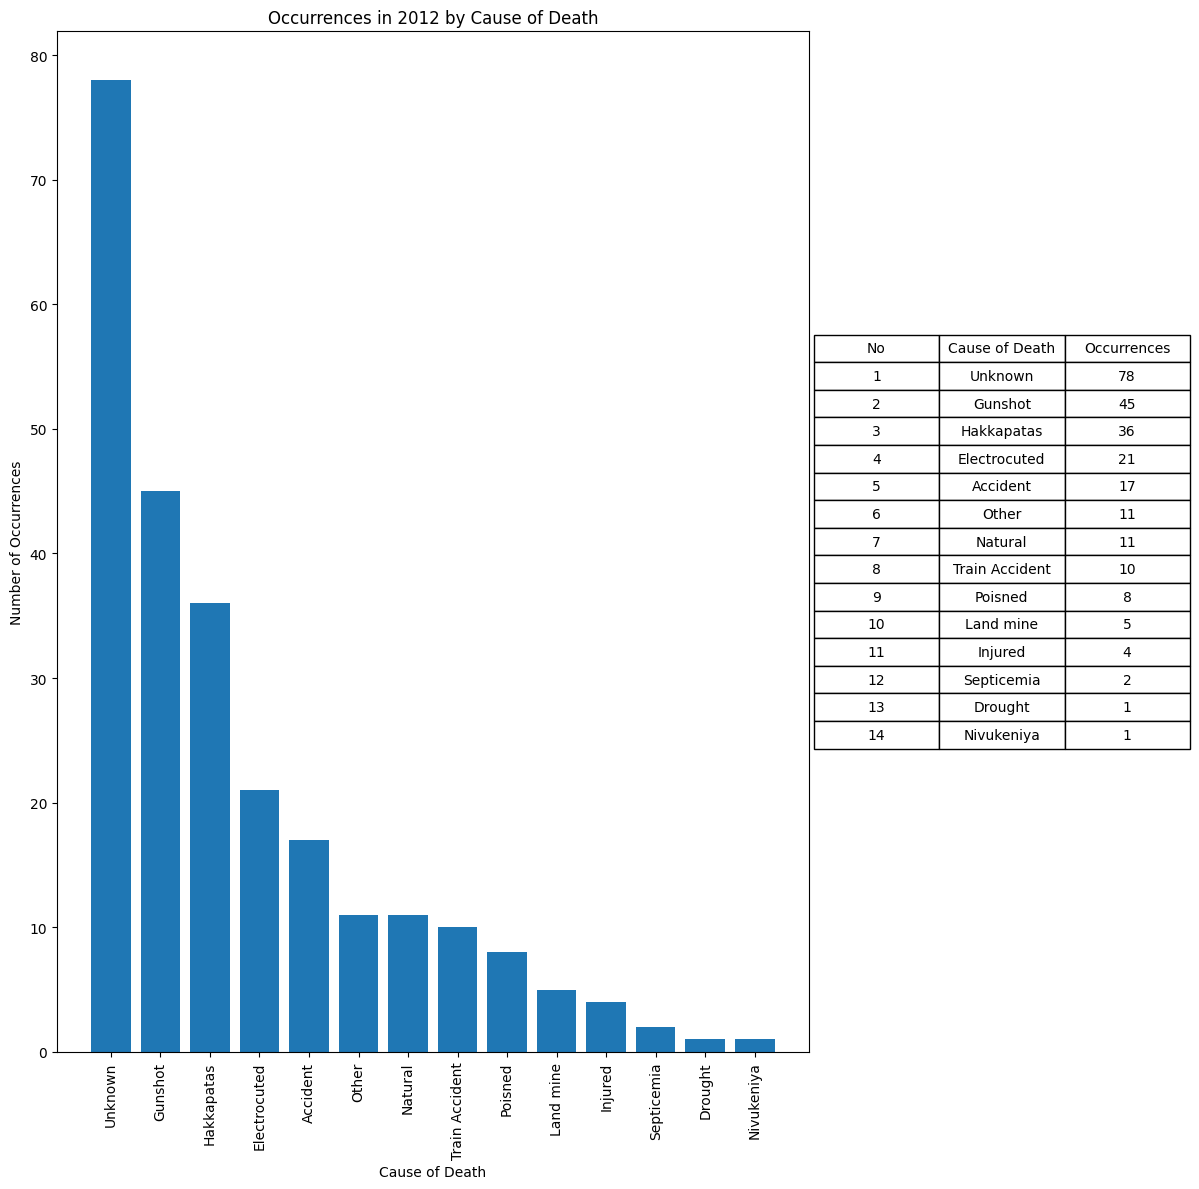

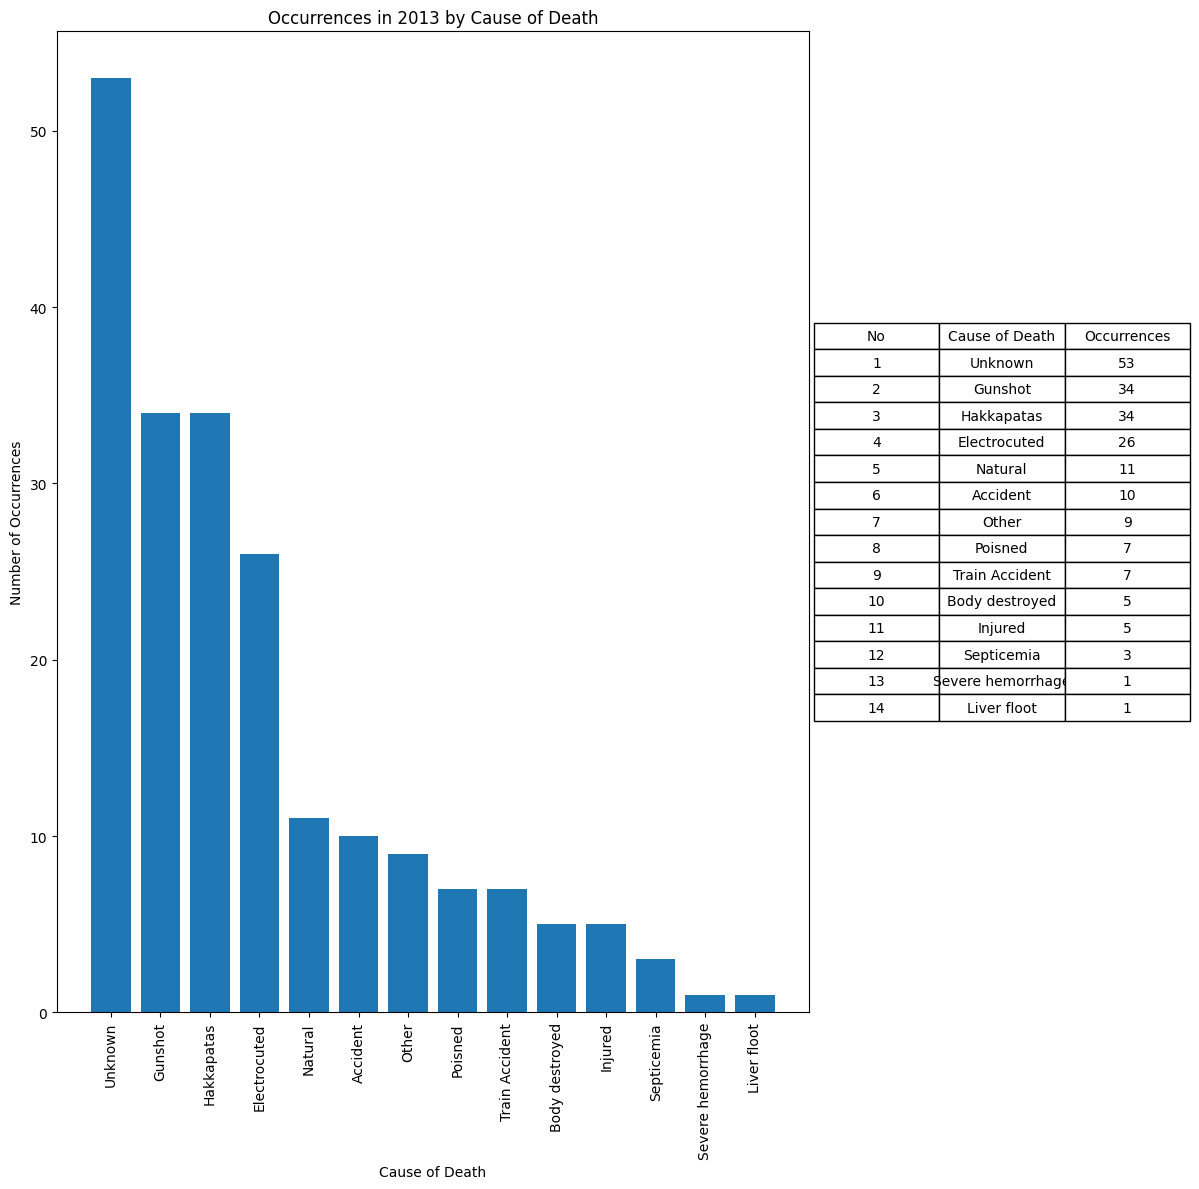

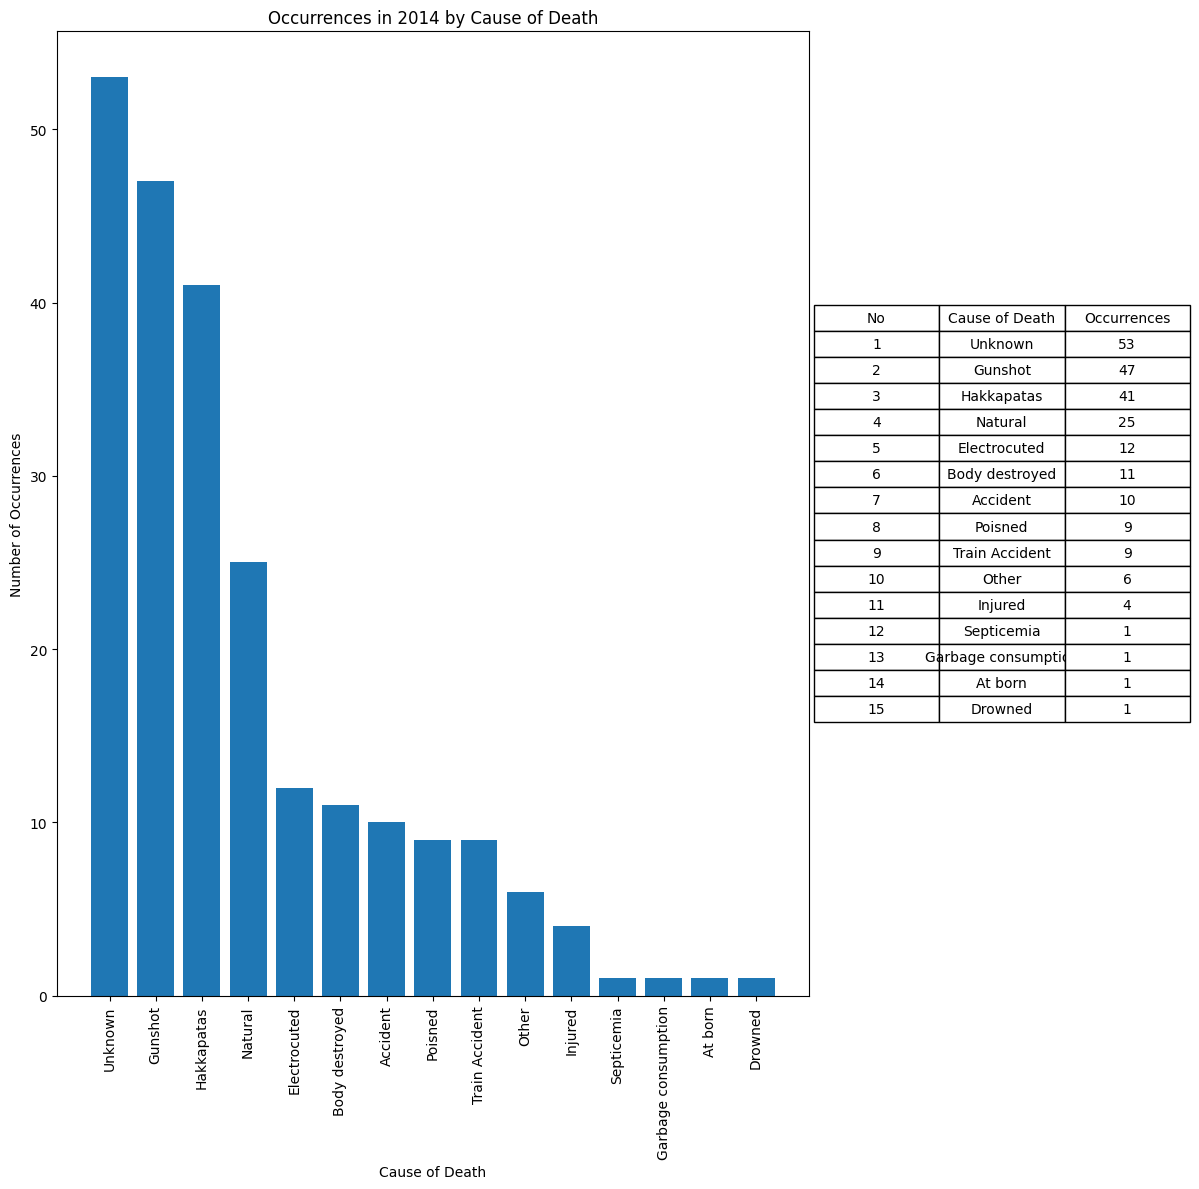

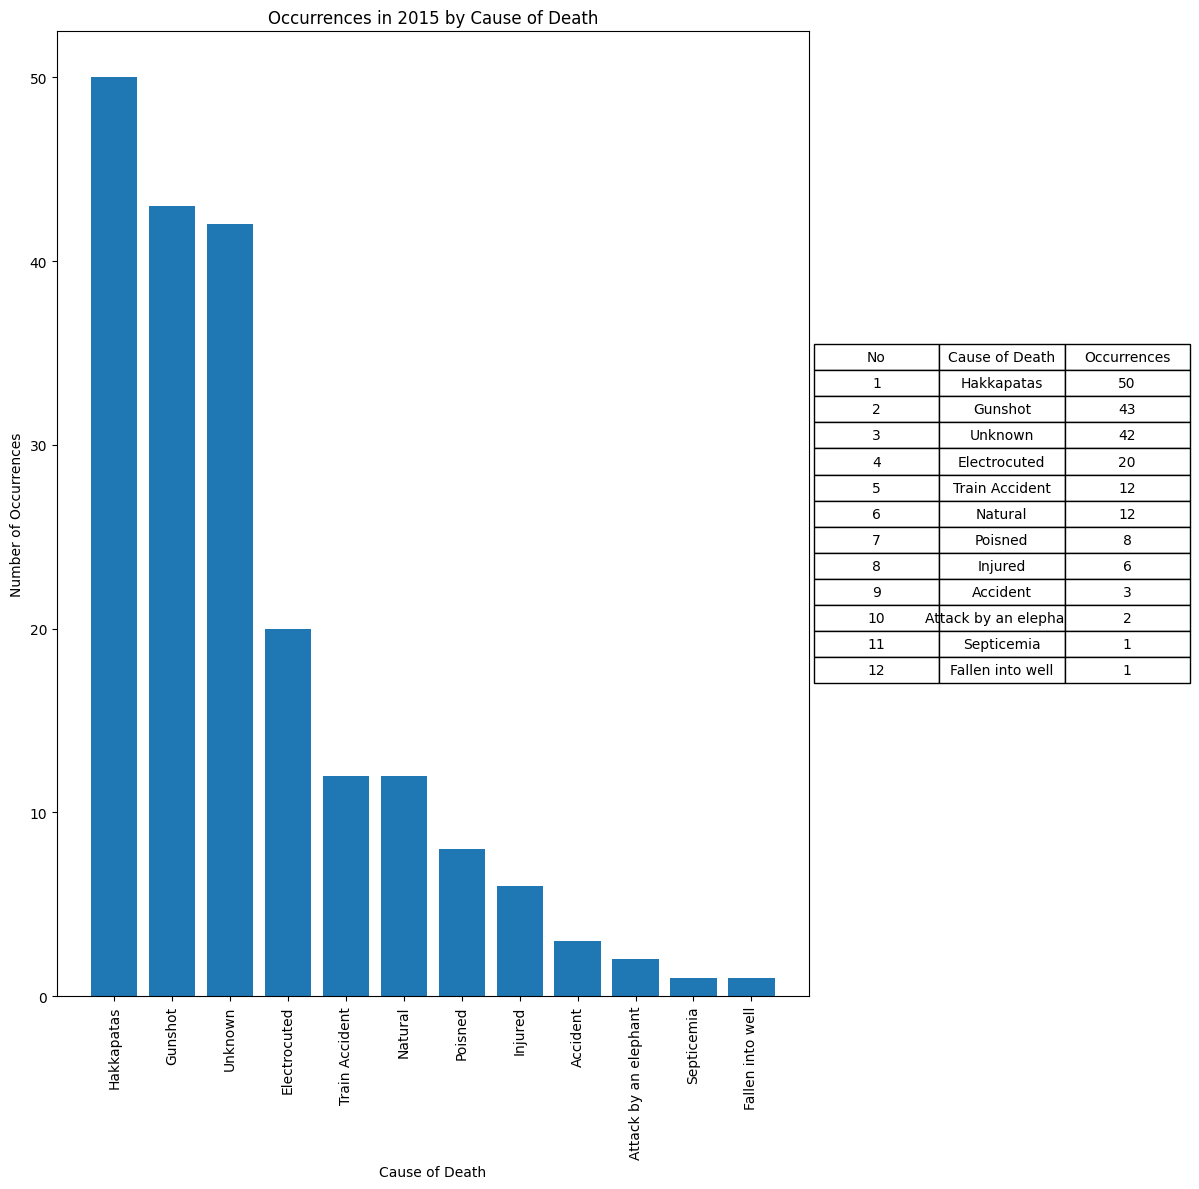

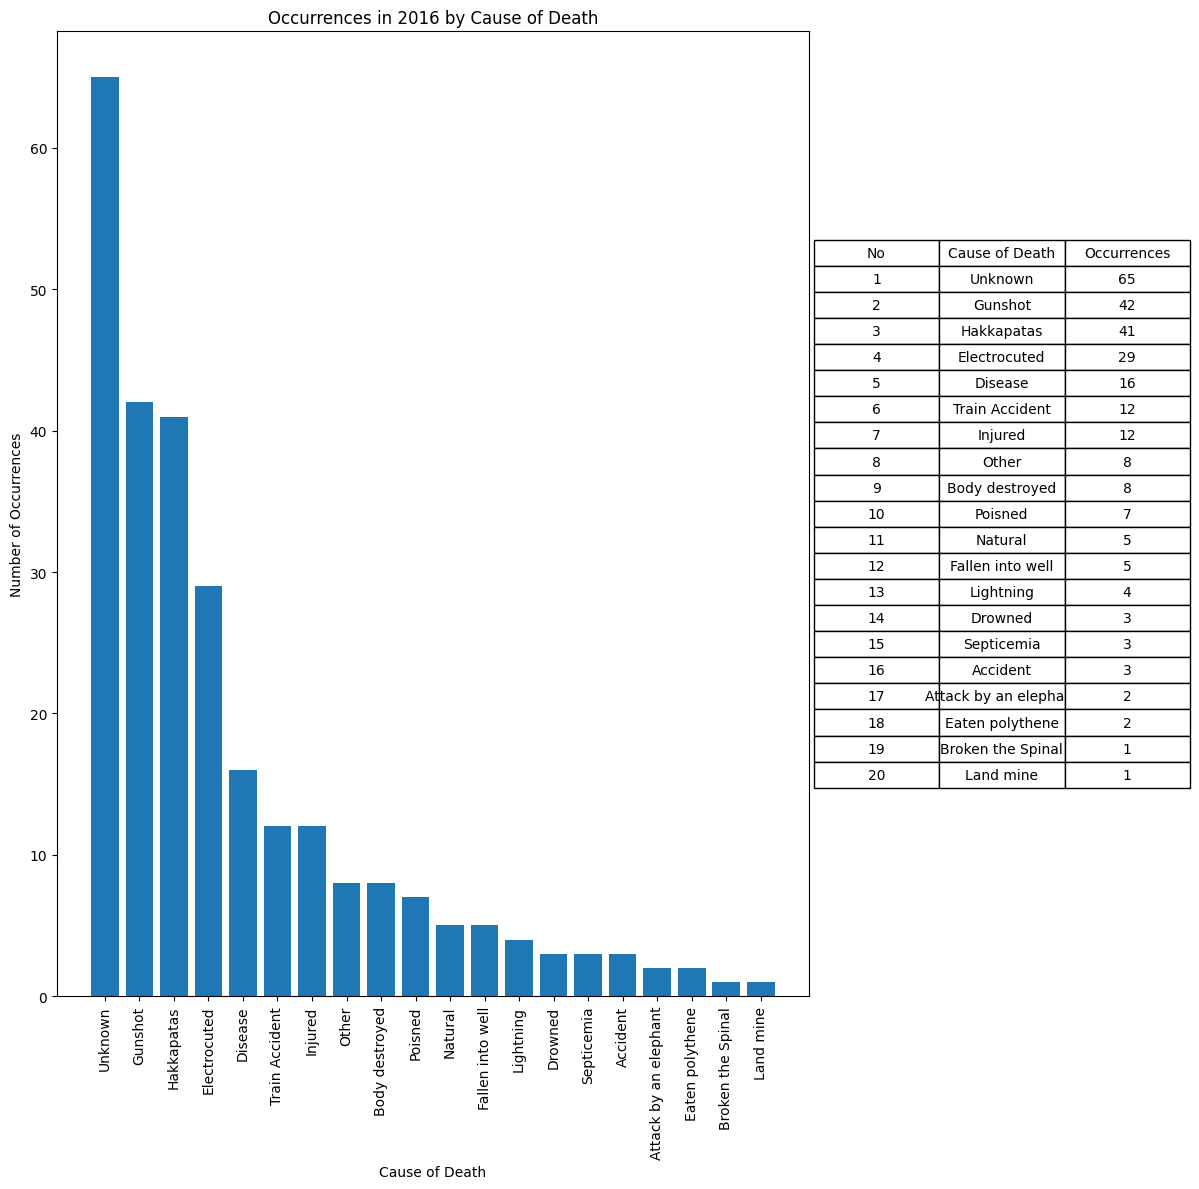

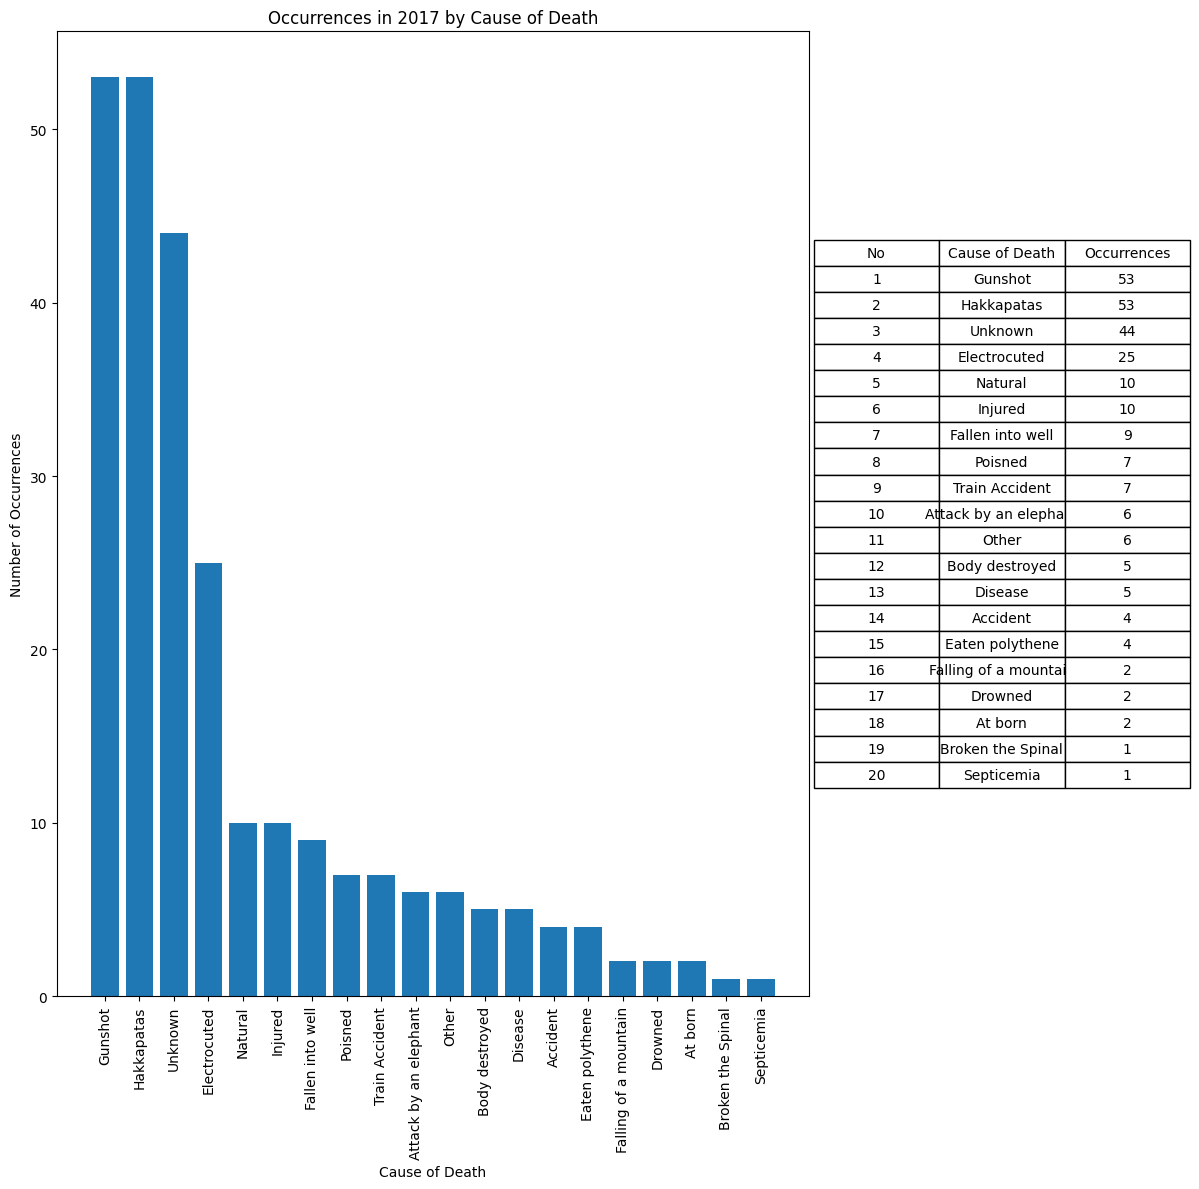

In [32]:
# Set 'Cause of Death' as index
causes_df = COD_df.set_index('Cause of Death', inplace=False)

# Years to loop through
years = range(2010, 2018)

# Loop through each year
for year in years:
    plt.figure(figsize=(12, 12))
    
    # Filter out causes with occurrence 0 for the current year
    data_to_plot = causes_df[causes_df[year] > 0]
    
    # Create a grid with 2 rows and 2 columns
    gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
    
    
    # Create the descending bar plot in the second cell of the grid
    plt.subplot(gs[0])
    descending_causes = data_to_plot[year].nlargest(len(data_to_plot))
    plt.bar(descending_causes.index, descending_causes)
    plt.xlabel('Cause of Death')
    plt.ylabel('Number of Occurrences')
    plt.title(f'Occurrences in {year} by Cause of Death')
    plt.xticks(rotation=90)
    
    

    # Create the descending table as a separate subplot in the fourth cell of the grid
    table_ax2 = plt.subplot(gs[1])
    table_data2 = [['No', 'Cause of Death', 'Occurrences']] + [[i + 1, r, c] for i, (r, c) in enumerate(zip(descending_causes.index, descending_causes))]
    col_labels2 = table_data2.pop(0)
    table2 = table_ax2.table(cellText=table_data2, colLabels=col_labels2, cellLoc='center', loc='center')
    table2.auto_set_font_size(False)
    table2.set_fontsize(10)
    table2.scale(1.5, 1.5)  # Adjust the table size
    table_ax2.axis('off')

    plt.tight_layout()
    plt.show()


In [33]:
COD_df = COD_df.transpose().reset_index()

# Set the first row as column headers
COD_df.columns = COD_df.iloc[0]

# Drop the first row
COD_df = COD_df[1:]

<Figure size 3000x1800 with 0 Axes>

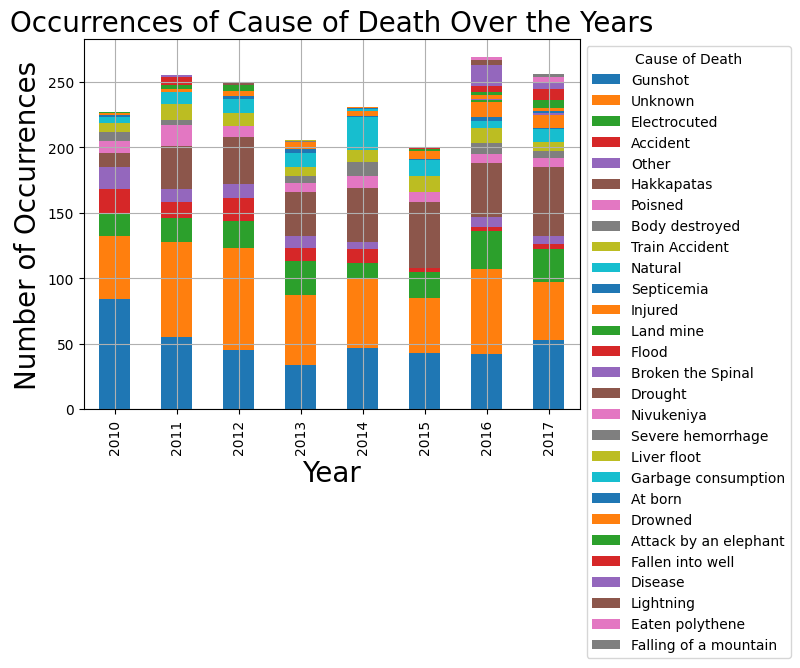

In [34]:
# Set 'D/S Office' as index
COD_df.set_index('Cause of Death', inplace=True)

# Create a stacked bar plot
plt.figure(figsize=(30, 18))
ax = COD_df.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.title('Occurrences of Cause of Death Over the Years', fontsize=20)

# Move the legend outside the plot to the right
ax.legend(title='Cause of Death', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.grid(True)
#plt.tight_layout()  # Ensures the legend fits within the plot area
plt.show()

## Gender

In [35]:
# Create a dictionary to store Gender counts for each year
Sex_counts = {}
for year, df in zip(range(2010, 2018), datasets):
    Sex_count = df['Sex'].value_counts().to_dict()
    Sex_counts[year] = Sex_count

# Create a DataFrame to store the Gender counts
Sex_df = pd.DataFrame(Sex_counts)

# Fill NaN values with 0 (if a Gender doesn't appear in a year's dataset)
Sex_df = Sex_df.fillna(0)

# Convert the values to integers
Sex_df = Sex_df.astype(int)

# Reset the index and rename the index column to 'Year'
Sex_df =Sex_df.reset_index().rename(columns={'index': 'Gender'})

In [36]:
Sex_df

Gender  2010  2011  2012  2013  2014  2015  2016  2017
0     Male   156   153   145   127   135   141   181   162
1   Female    50    72    85    68    68    41    73    70
2  Unknown    18    25    18    11    28    18    15    22
3     Calf     3     5     2     0     0     0     0     2

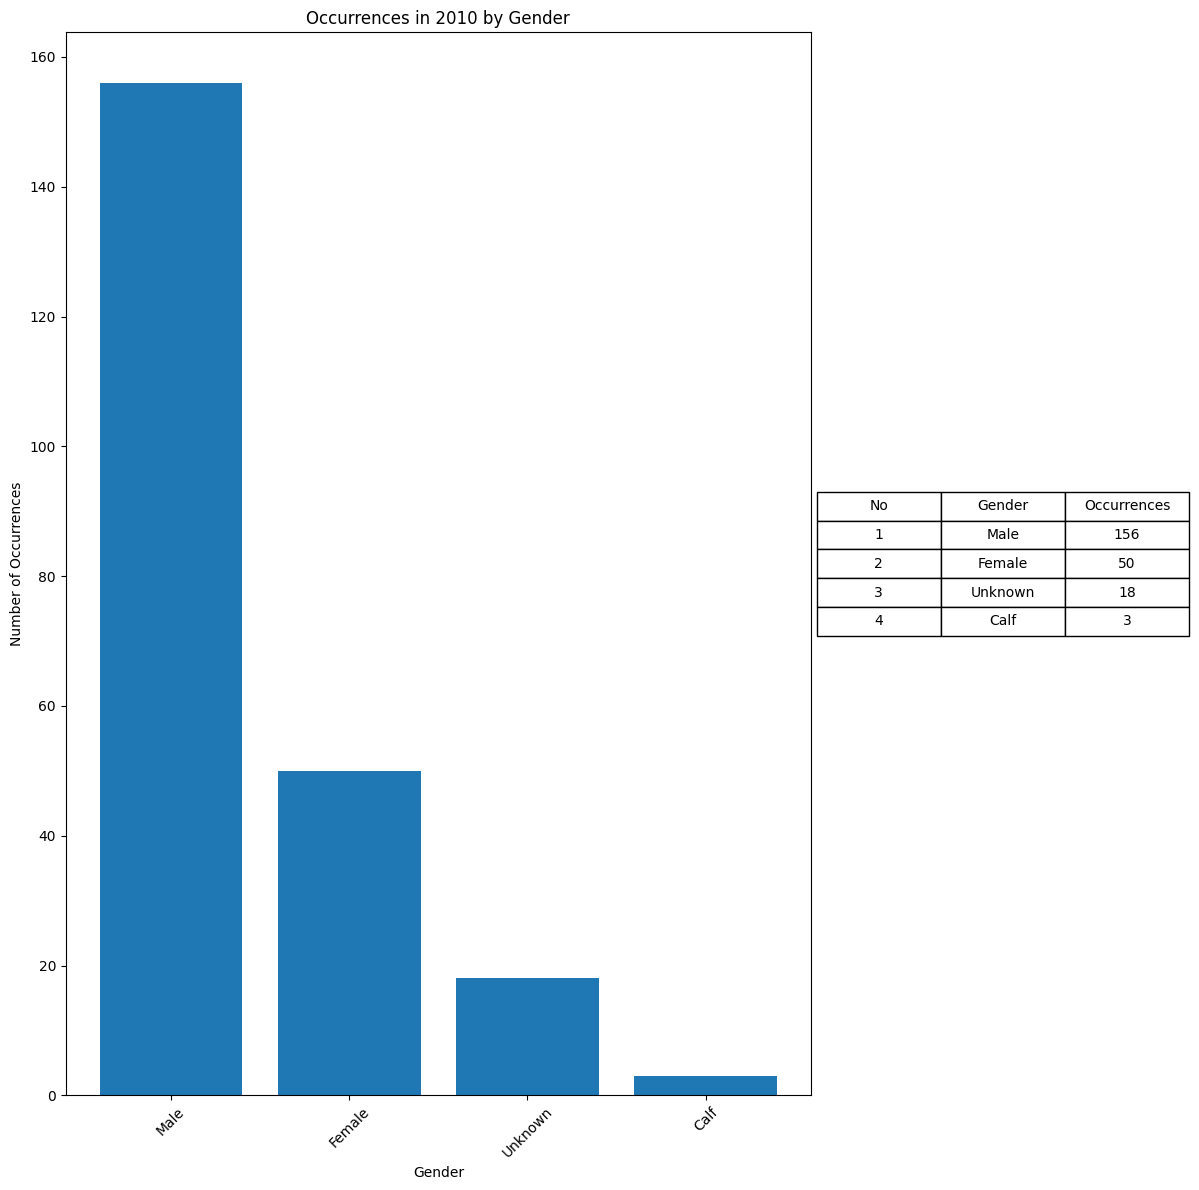

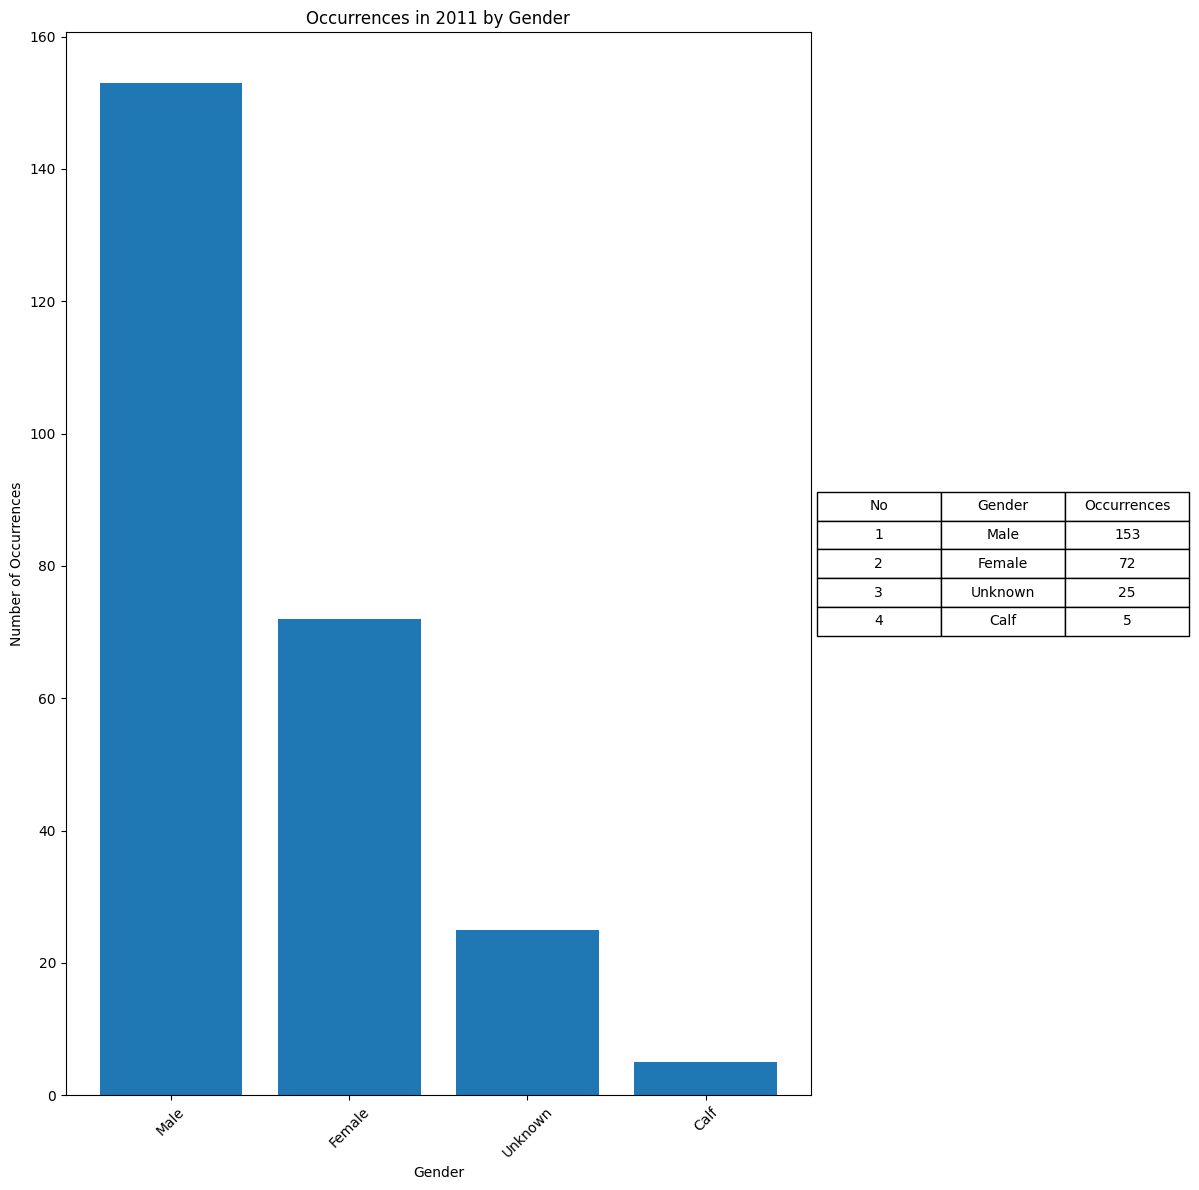

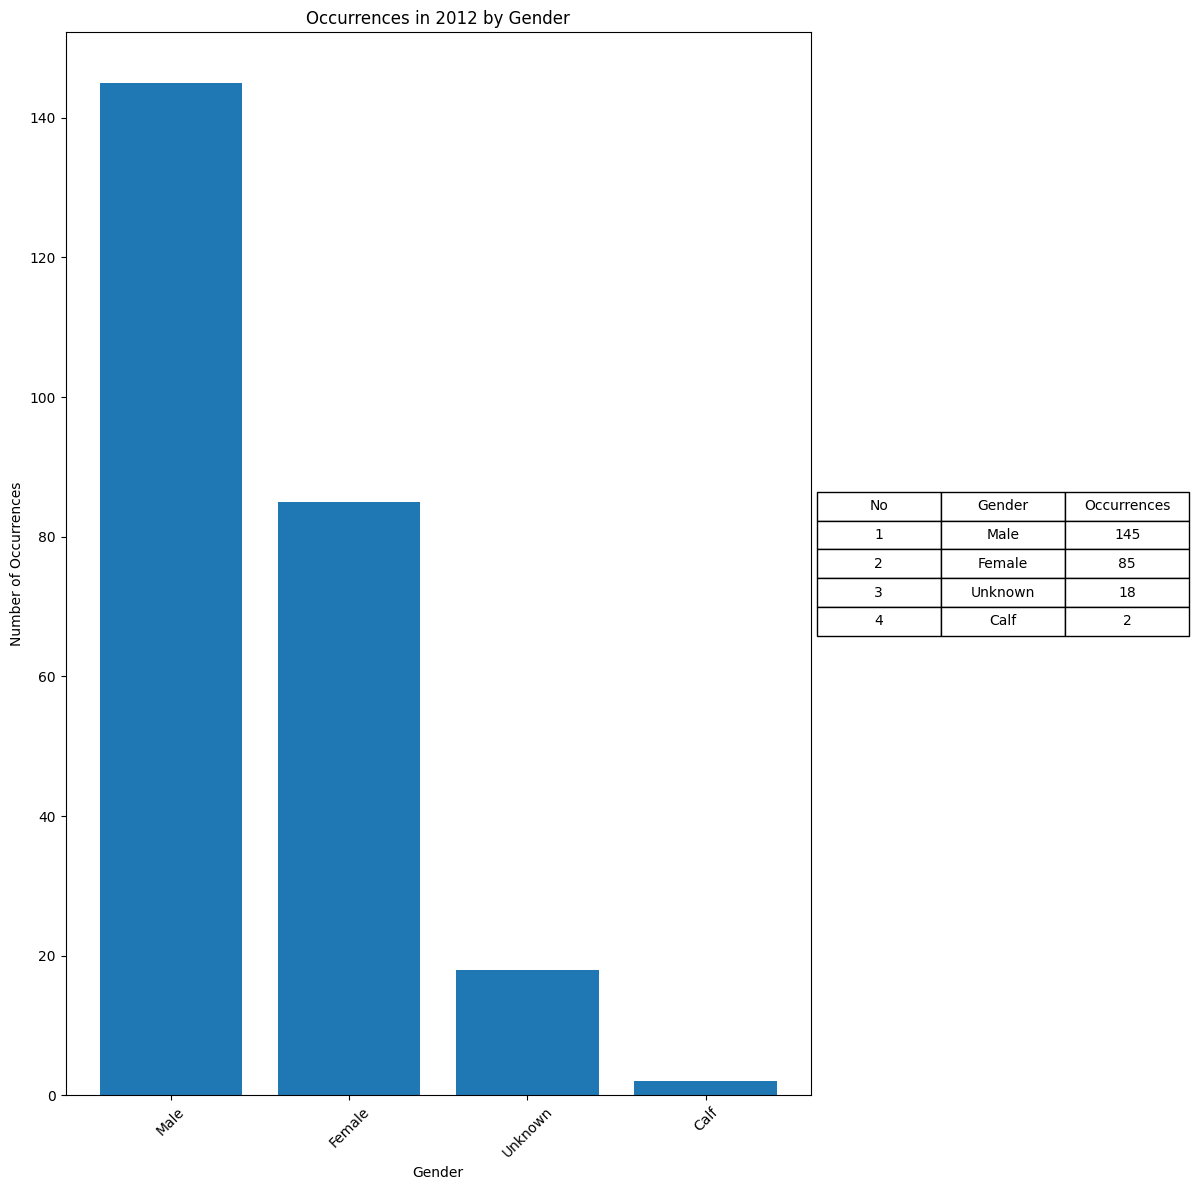

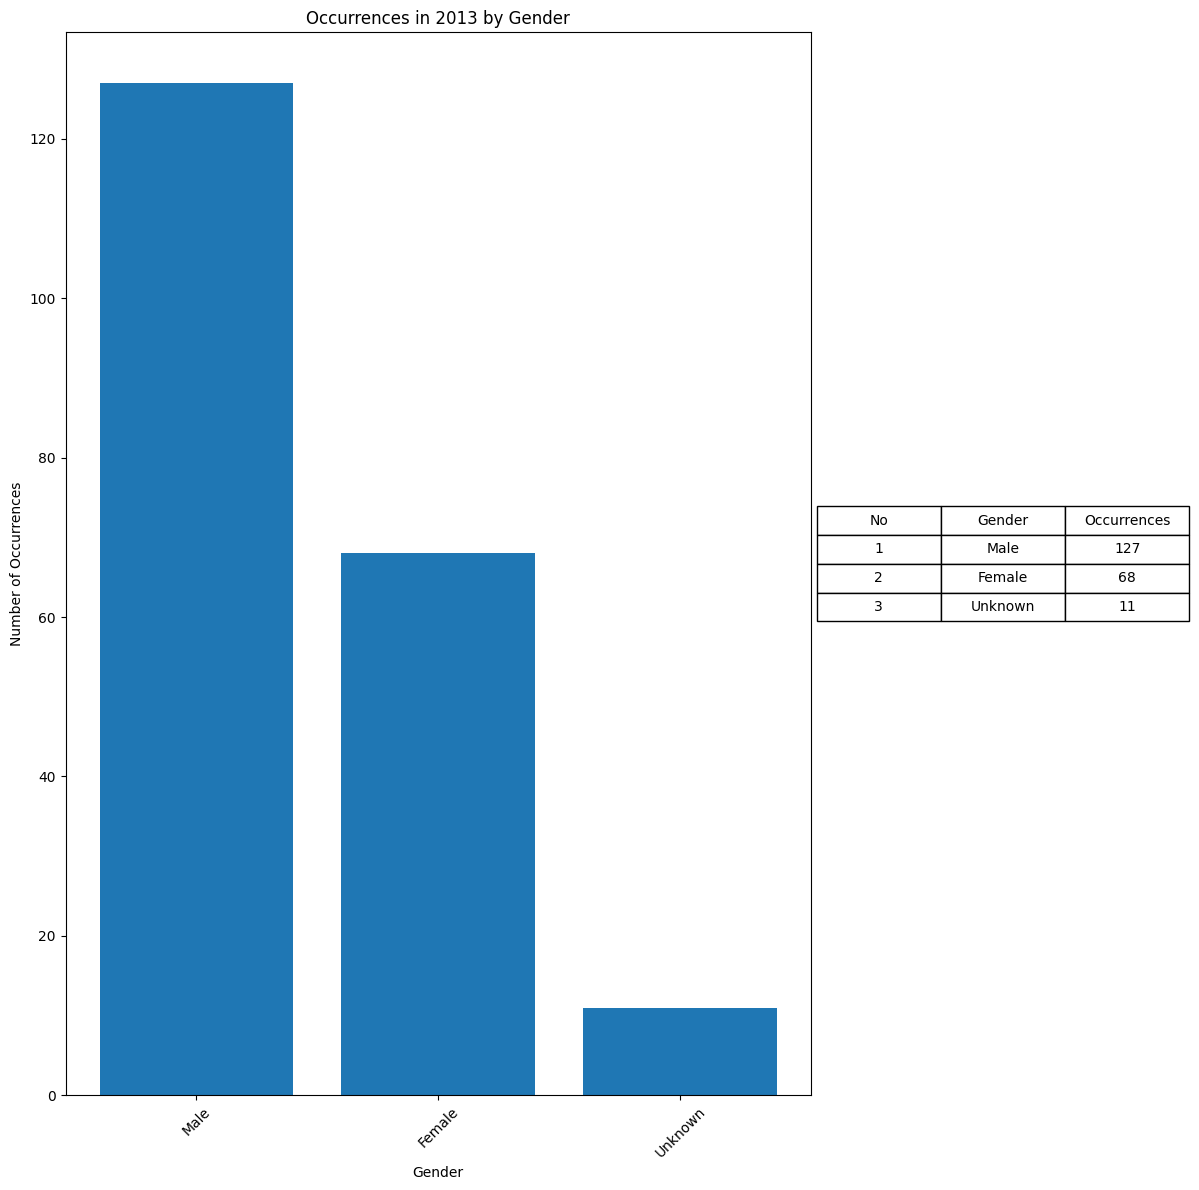

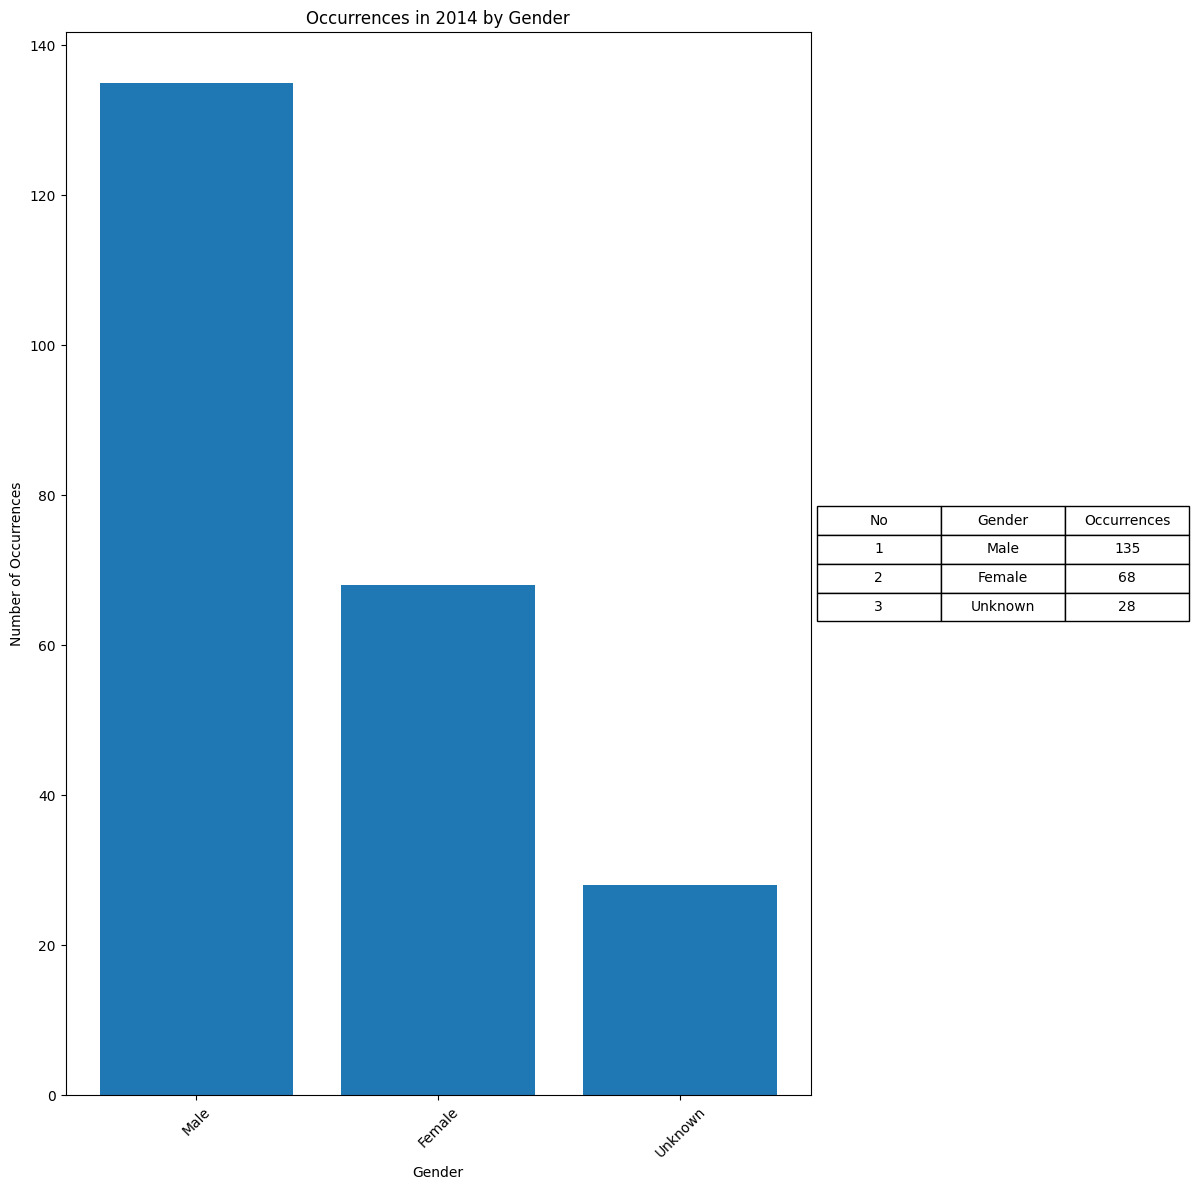

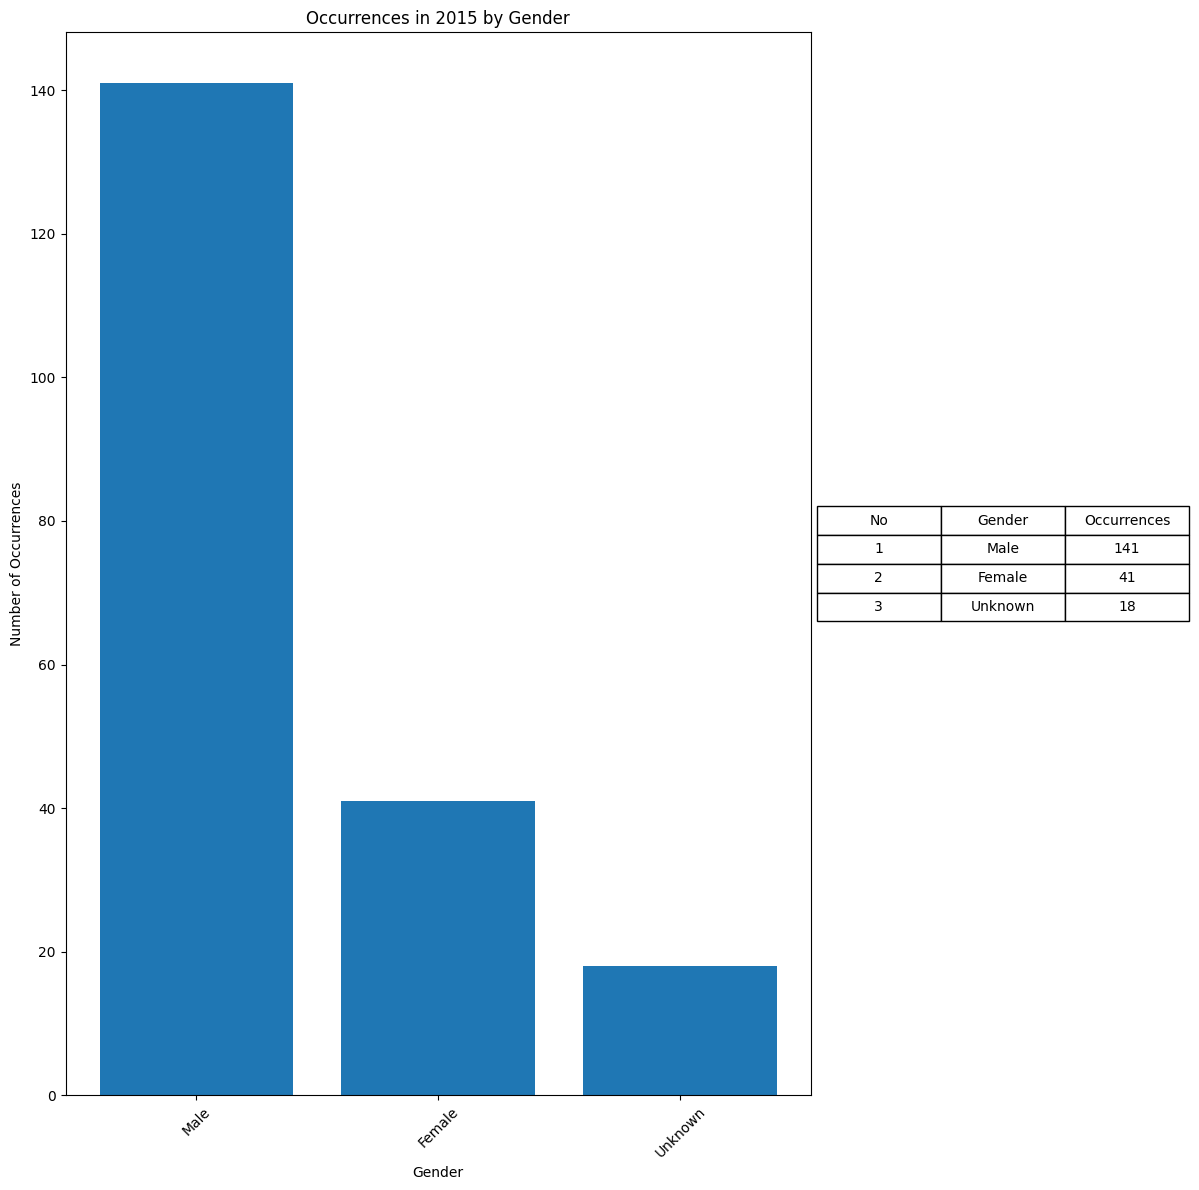

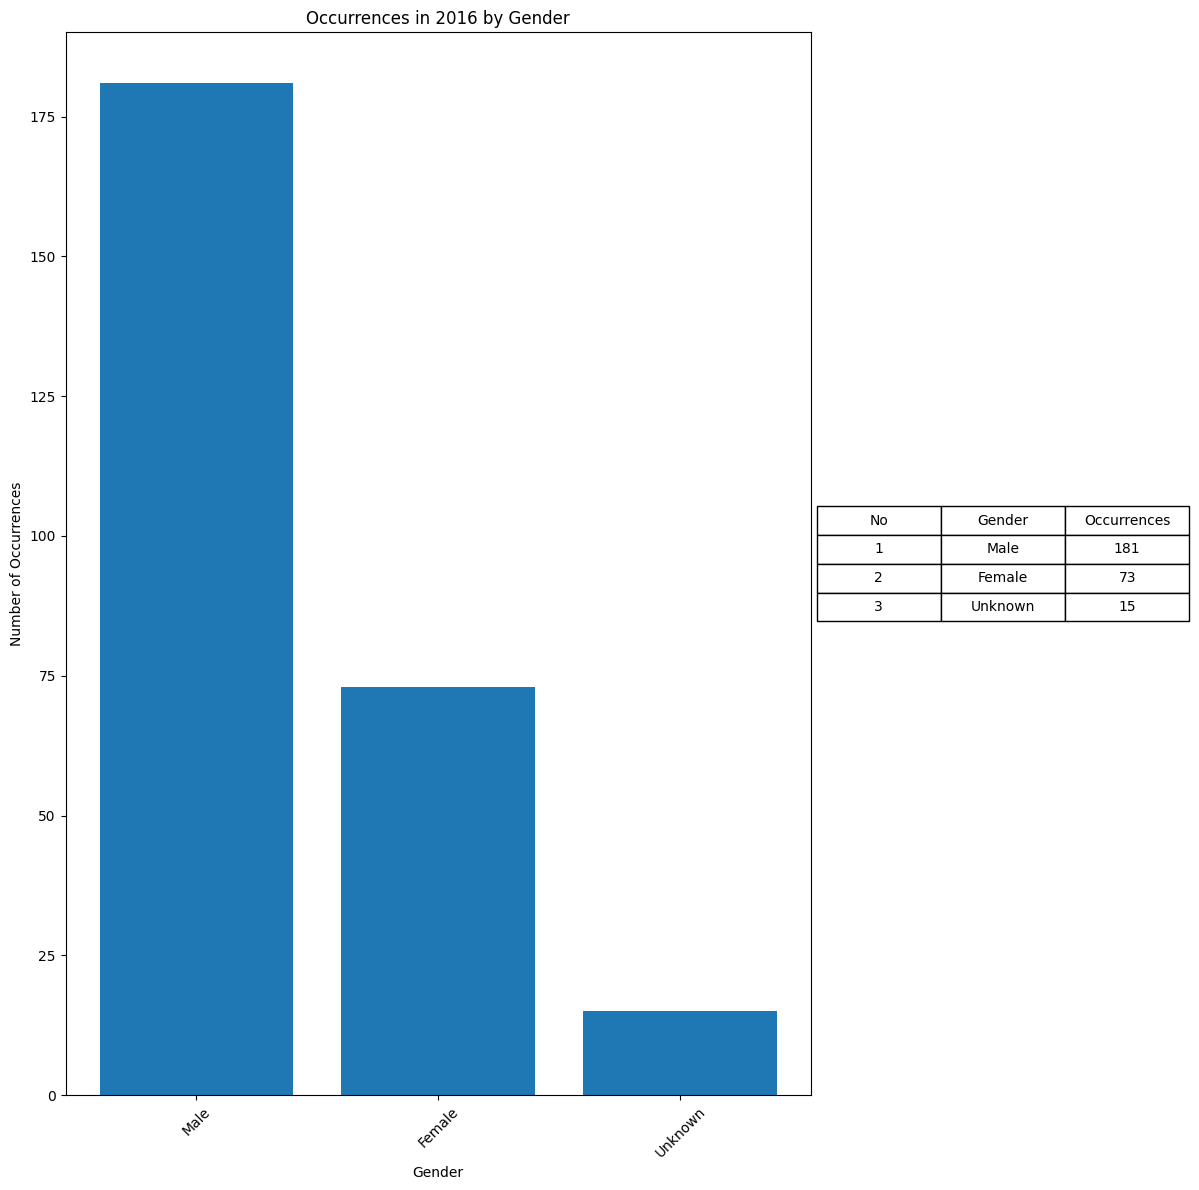

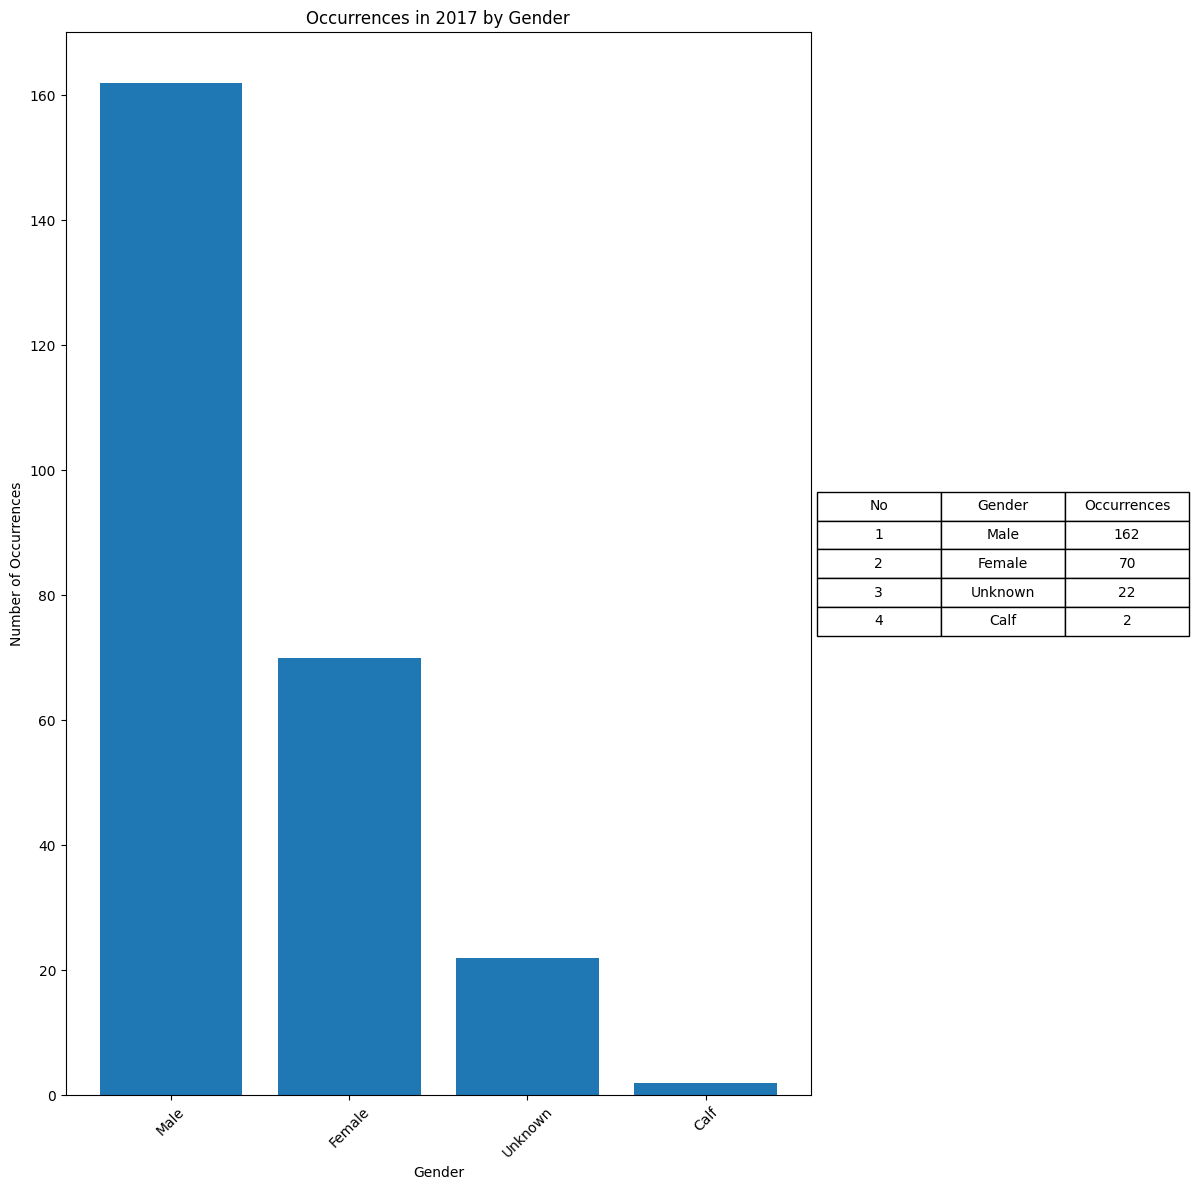

In [37]:
# Set 'Cause of Death' as index
sex_df = Sex_df.set_index('Gender', inplace=False)

# Years to loop through
years = range(2010, 2018)

# Loop through each year
for year in years:
    plt.figure(figsize=(12, 12))
    
    # Filter out causes with occurrence 0 for the current year
    data_to_plot = sex_df[sex_df[year] > 0]
    
    # Create a grid with 2 rows and 2 columns
    gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
    
    
    # Create the descending bar plot in the second cell of the grid
    plt.subplot(gs[0])
    descending_causes = data_to_plot[year].nlargest(len(data_to_plot))
    plt.bar(descending_causes.index, descending_causes)
    plt.xlabel('Gender')
    plt.ylabel('Number of Occurrences')
    plt.title(f'Occurrences in {year} by Gender')
    plt.xticks(rotation=45)
    
    

    # Create the descending table as a separate subplot in the fourth cell of the grid
    table_ax2 = plt.subplot(gs[1])
    table_data2 = [['No', 'Gender', 'Occurrences']] + [[i + 1, r, c] for i, (r, c) in enumerate(zip(descending_causes.index, descending_causes))]
    col_labels2 = table_data2.pop(0)
    table2 = table_ax2.table(cellText=table_data2, colLabels=col_labels2, cellLoc='center', loc='center')
    table2.auto_set_font_size(False)
    table2.set_fontsize(10)
    table2.scale(1.5, 1.5)  # Adjust the table size
    table_ax2.axis('off')

    plt.tight_layout()
    plt.show()


In [38]:
Sex_df = Sex_df.transpose().reset_index()

# Set the first row as column headers
Sex_df.columns = Sex_df.iloc[0]

# Drop the first row
Sex_df = Sex_df[1:]

<Figure size 3000x1800 with 0 Axes>

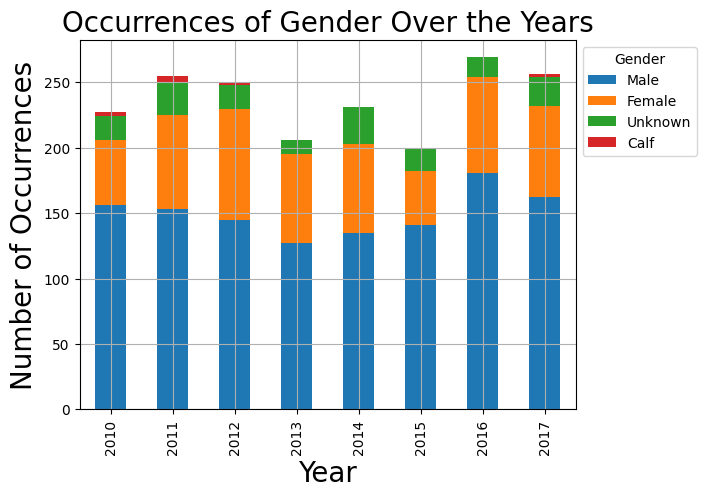

In [39]:
# Set 'D/S Office' as index
Sex_df.set_index('Gender', inplace=True)

# Create a stacked bar plot
plt.figure(figsize=(30, 18))
ax = Sex_df.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.title('Occurrences of Gender Over the Years', fontsize=20)

# Move the legend outside the plot to the right
ax.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Display the plot
plt.grid(True)
#plt.tight_layout()  # Ensures the legend fits within the plot area
plt.show()

## Age Category

In [40]:
# Create a dictionary to store Age category counts for each year
Age_counts = {}
for year, df in zip(range(2010, 2018), datasets):
    Age_count = df['Age Category'].value_counts().to_dict()
    Age_counts[year] = Age_count

# Create a DataFrame to store the Age category counts
Age_df = pd.DataFrame(Age_counts)

# Fill NaN values with 0 (if a Age category doesn't appear in a year's dataset)
Age_df = Age_df.fillna(0)

# Convert the values to integers
Age_df = Age_df.astype(int)

# Reset the index and rename the index column to 'Year'
Age_df =Age_df.reset_index().rename(columns={'index': 'Age Category'})

In [41]:
Age_df

Age Category  2010  2011  2012  2013  2014  2015  2016  2017
0  Subadults and adults   163   168   151   132   138   119   167   165
1              Juvenile    24    38    36    38    34    41    51    43
2                  Calf    17    20    19    17    19     9    21    14
3               Unknown    15    21    31    14    34    28    14    25
4                Infant     8     8    13     5     6     3    16     9

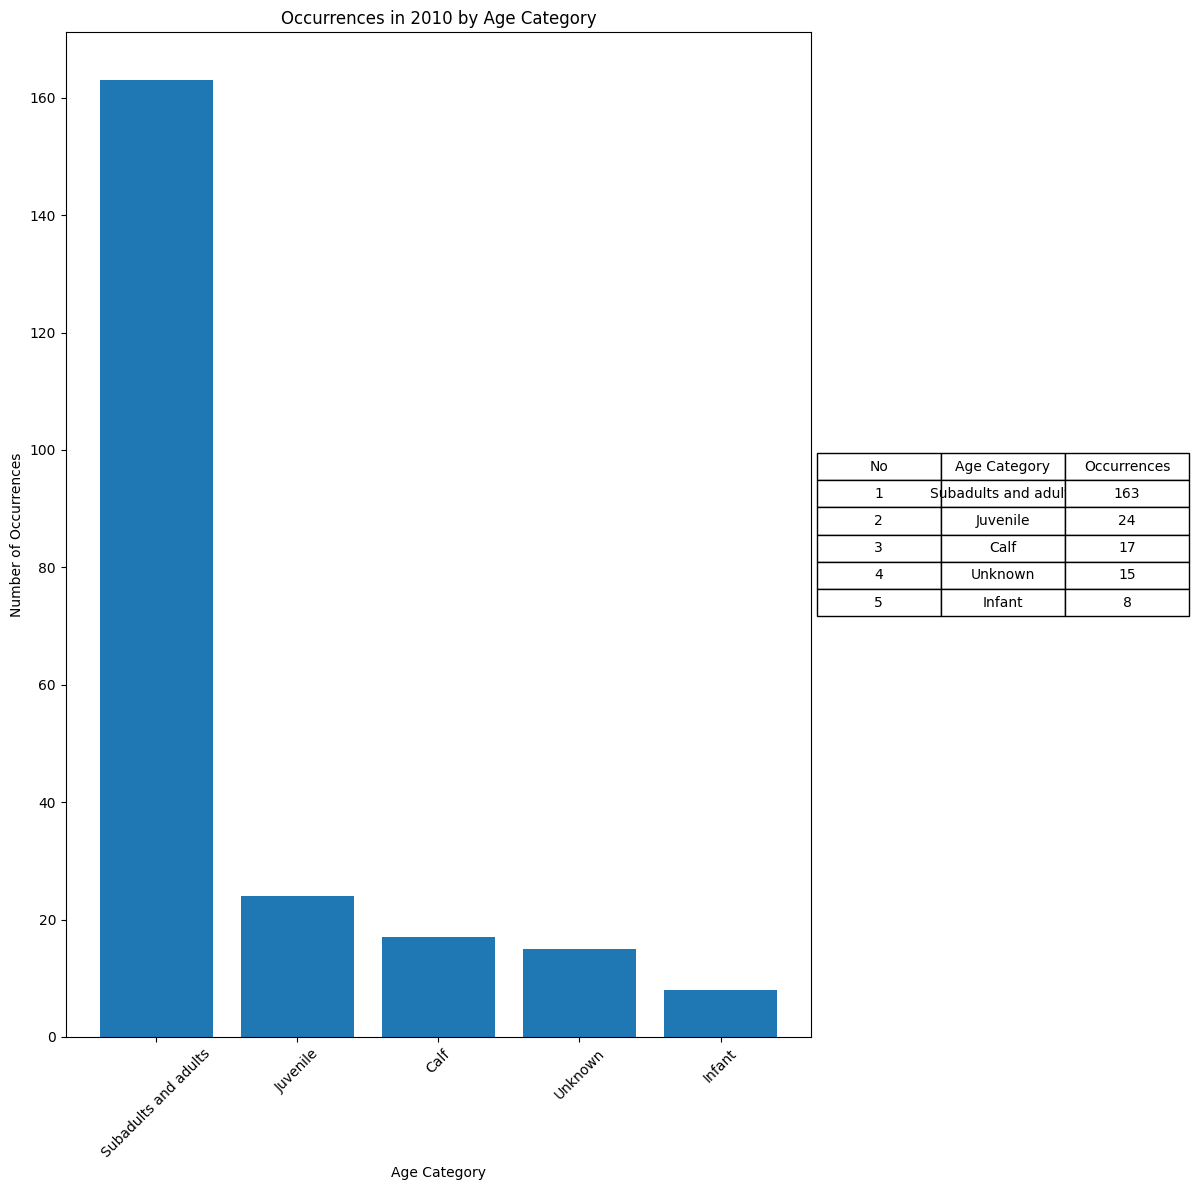

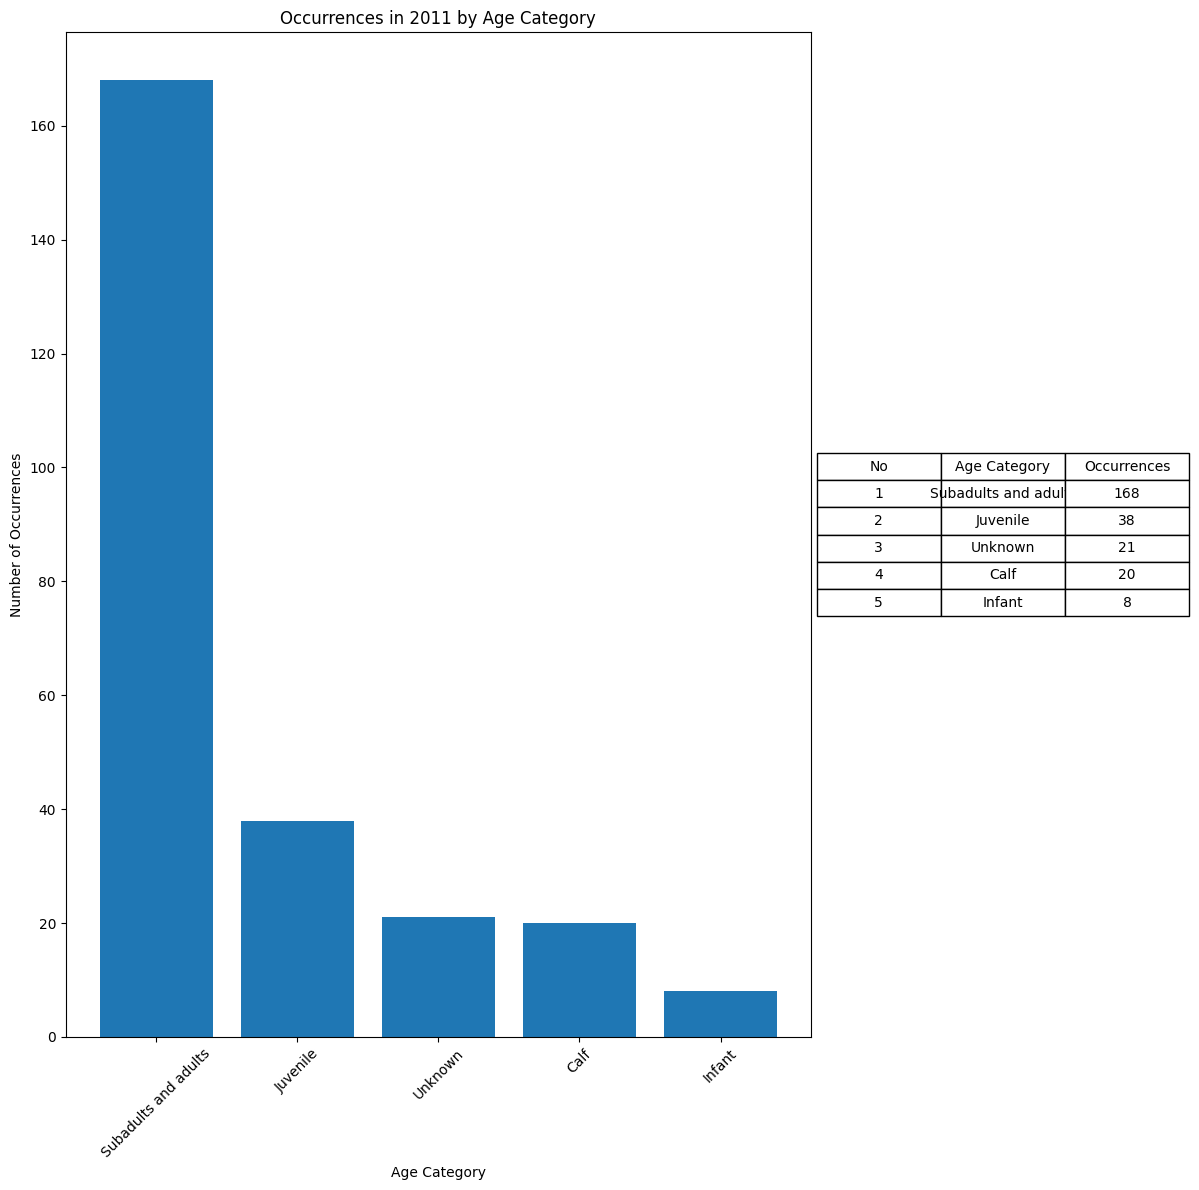

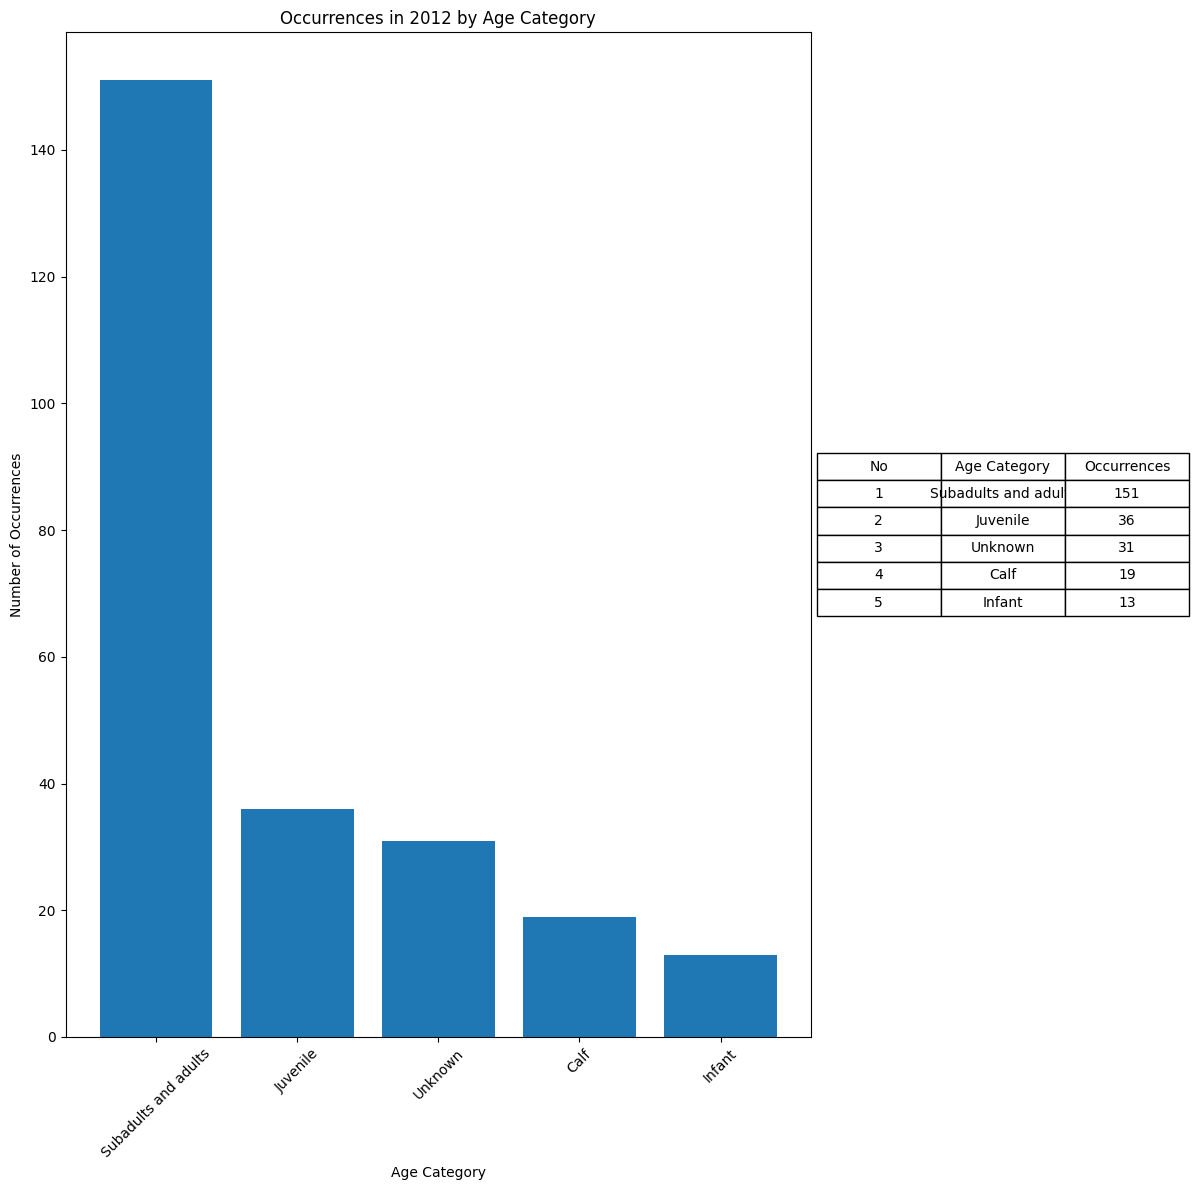

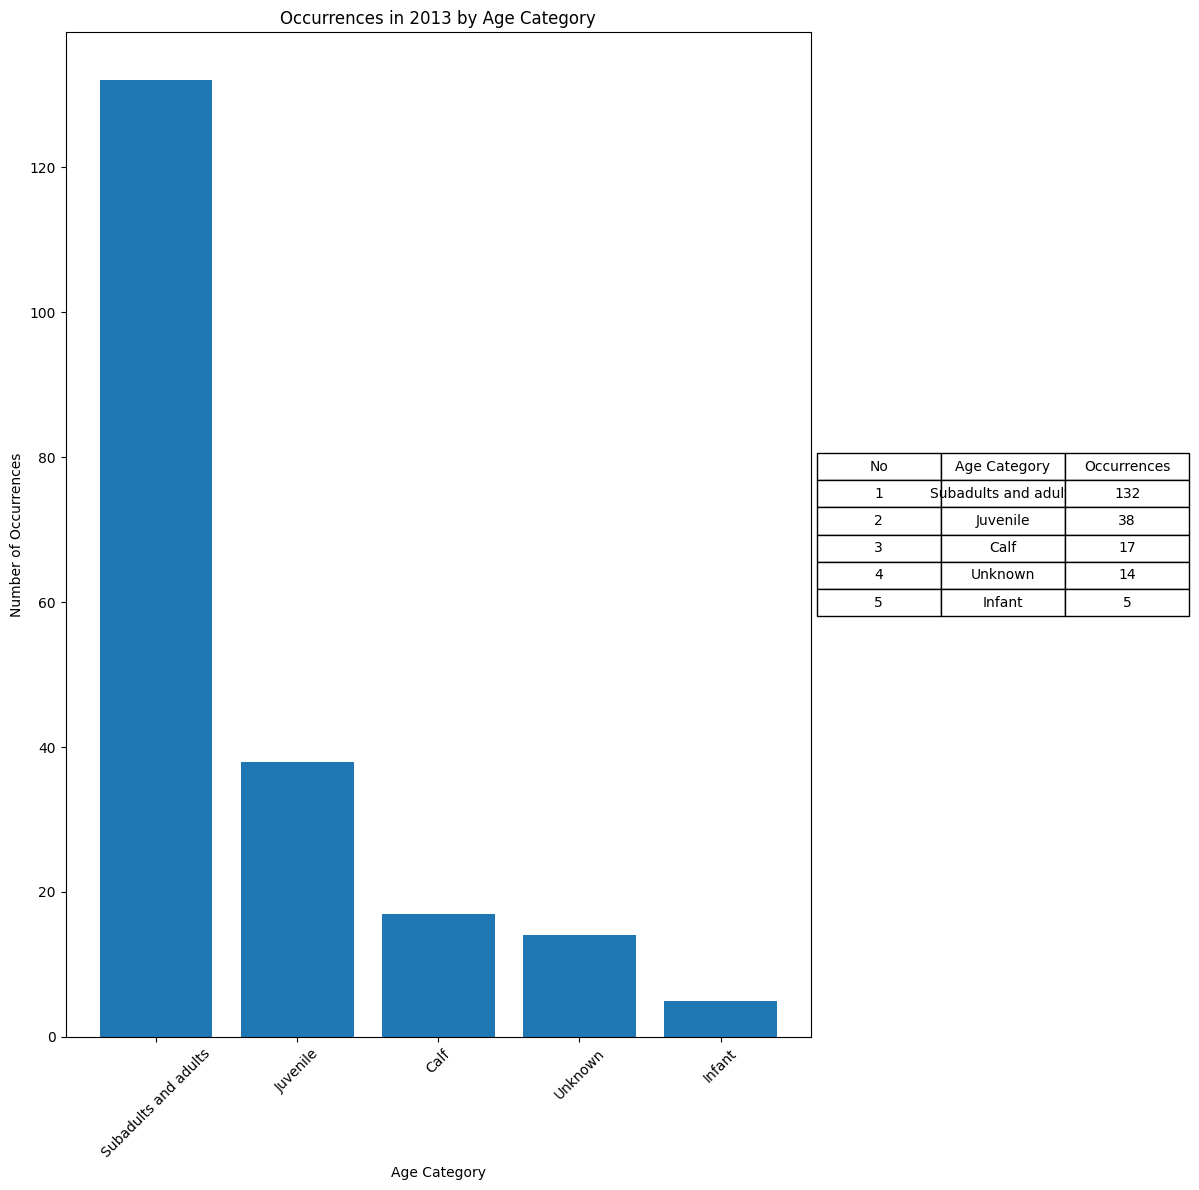

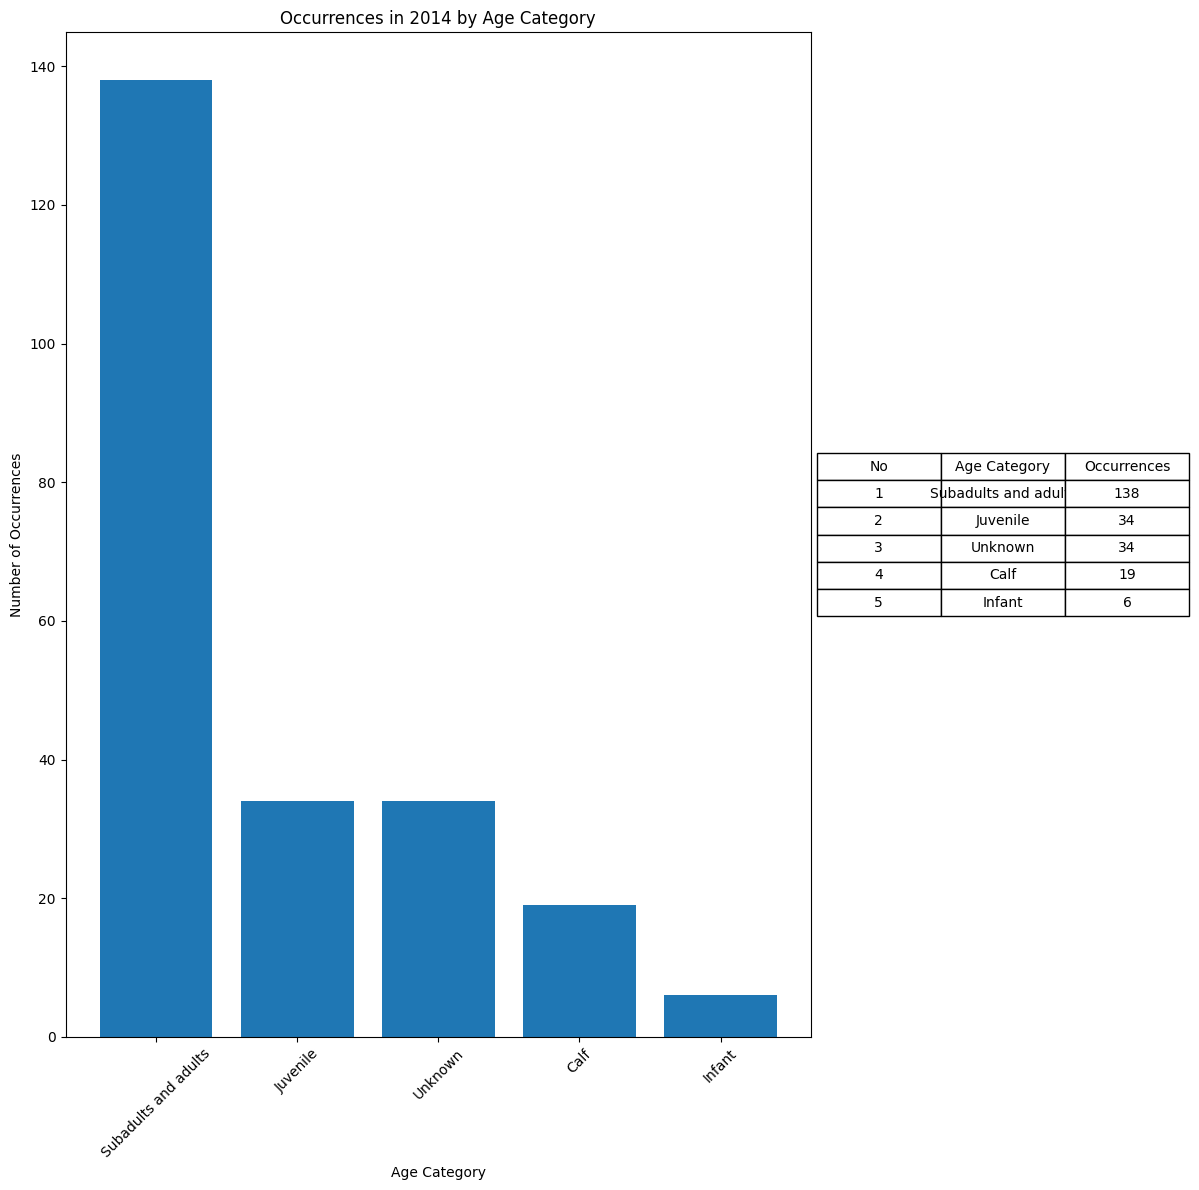

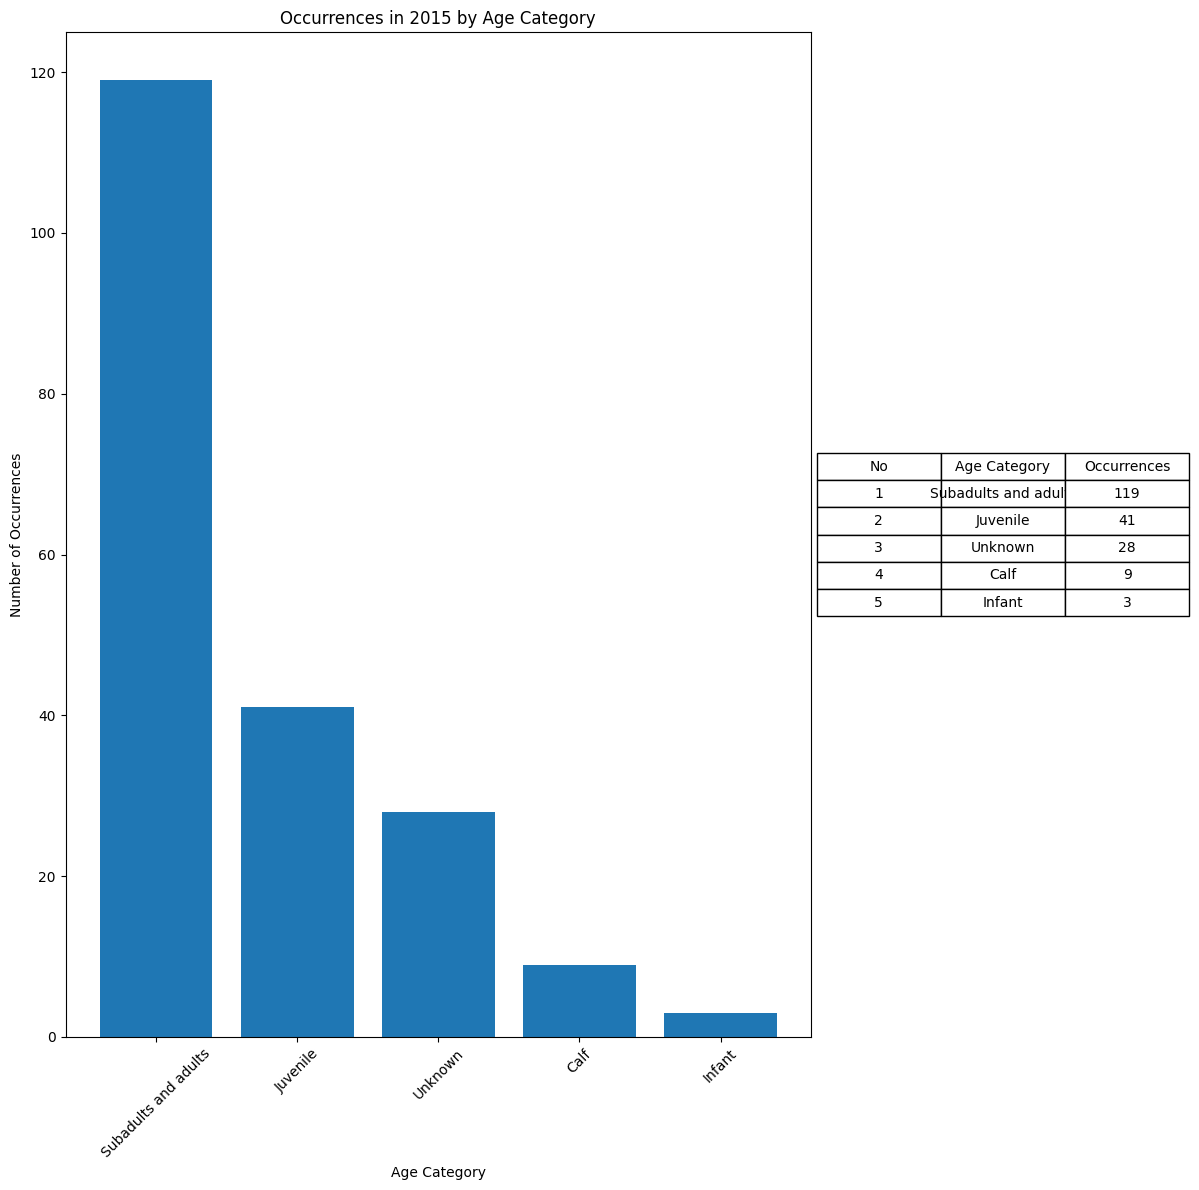

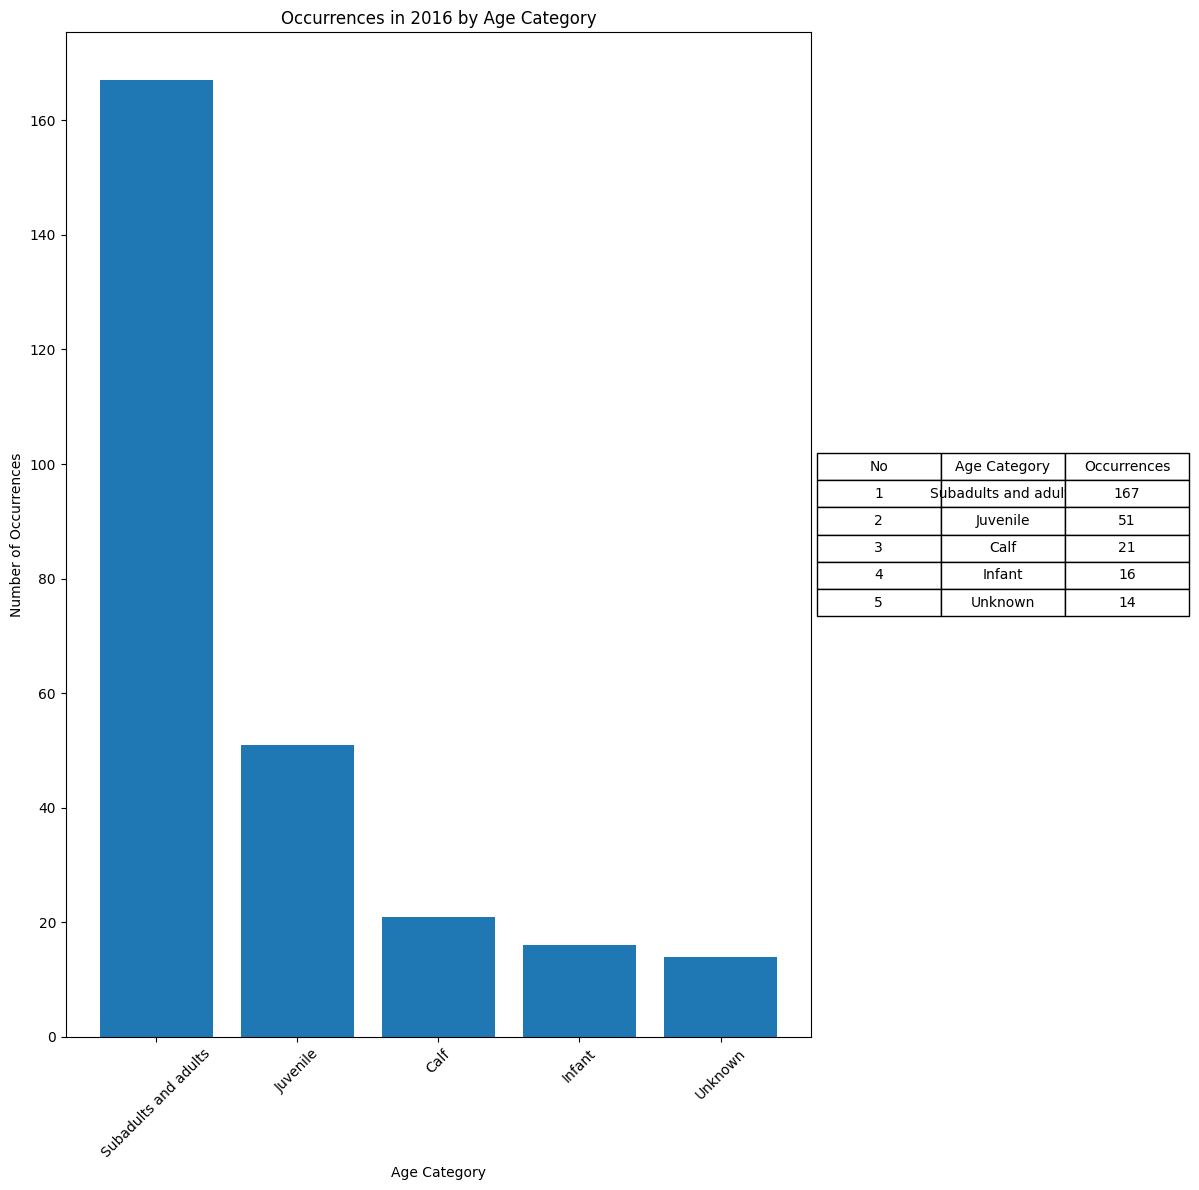

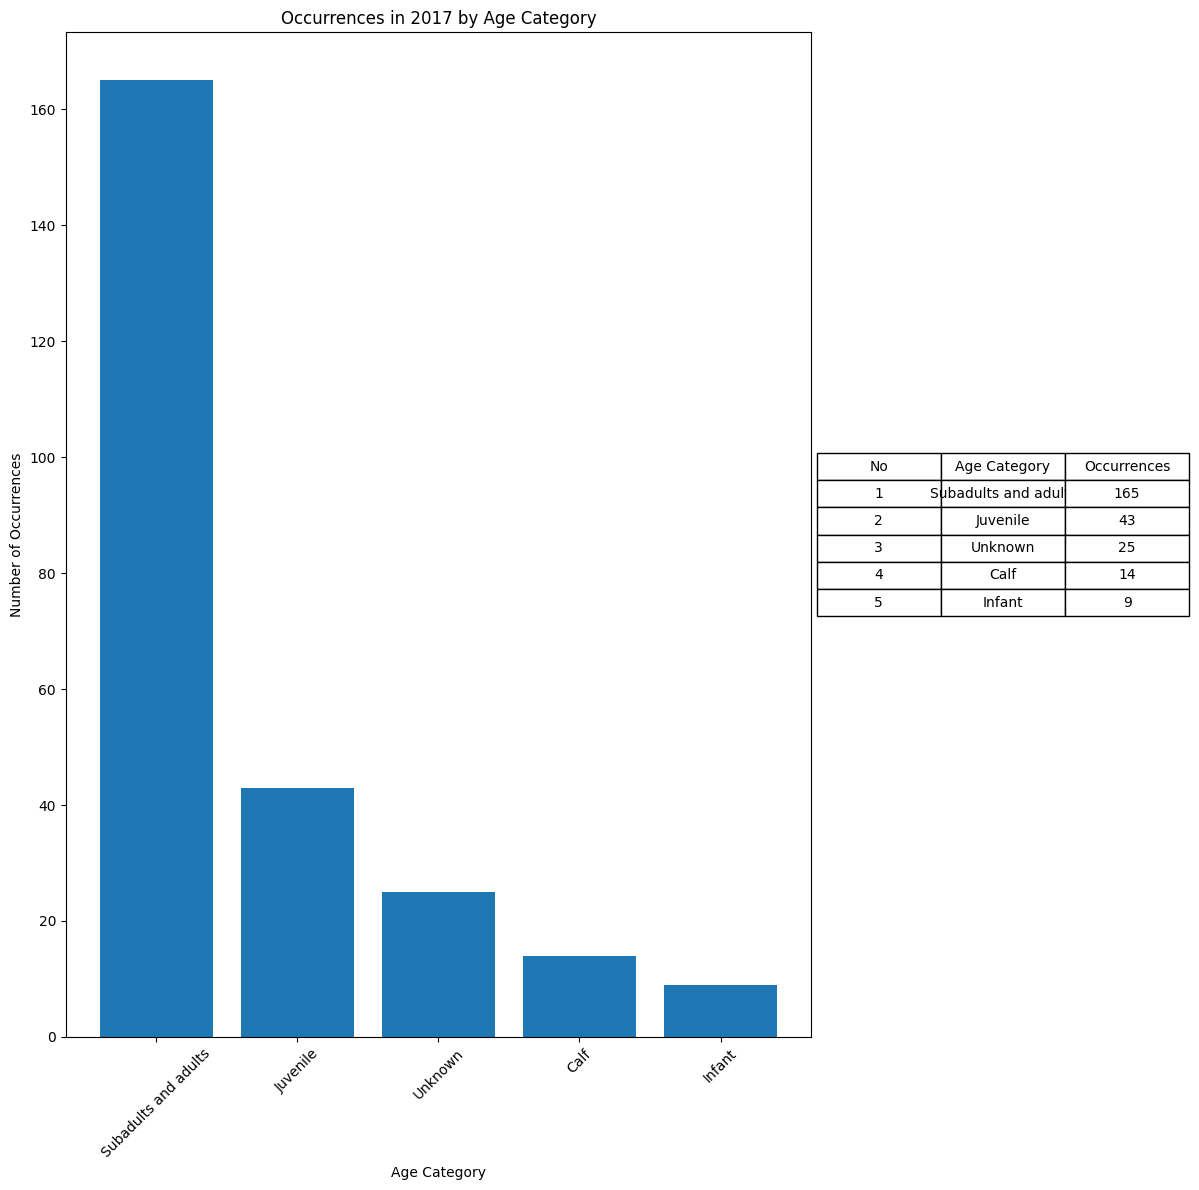

In [42]:
# Set 'Cause of Death' as index
age_df = Age_df.set_index('Age Category', inplace=False)

# Years to loop through
years = range(2010, 2018)

# Loop through each year
for year in years:
    plt.figure(figsize=(12, 12))
    
    # Filter out causes with occurrence 0 for the current year
    data_to_plot = age_df[age_df[year] > 0]
    
    # Create a grid with 2 rows and 2 columns
    gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
    
    
    # Create the descending bar plot in the second cell of the grid
    plt.subplot(gs[0])
    descending_causes = data_to_plot[year].nlargest(len(data_to_plot))
    plt.bar(descending_causes.index, descending_causes)
    plt.xlabel('Age Category')
    plt.ylabel('Number of Occurrences')
    plt.title(f'Occurrences in {year} by Age Category')
    plt.xticks(rotation=45)
    
    

    # Create the descending table as a separate subplot in the fourth cell of the grid
    table_ax2 = plt.subplot(gs[1])
    table_data2 = [['No', 'Age Category', 'Occurrences']] + [[i + 1, r, c] for i, (r, c) in enumerate(zip(descending_causes.index, descending_causes))]
    col_labels2 = table_data2.pop(0)
    table2 = table_ax2.table(cellText=table_data2, colLabels=col_labels2, cellLoc='center', loc='center')
    table2.auto_set_font_size(False)
    table2.set_fontsize(10)
    table2.scale(1.5, 1.5)  # Adjust the table size
    table_ax2.axis('off')

    plt.tight_layout()
    plt.show()


In [43]:
Age_df = Age_df.transpose().reset_index()

# Set the first row as column headers
Age_df.columns = Age_df.iloc[0]

# Drop the first row
Age_df = Age_df[1:]

<Figure size 3000x1800 with 0 Axes>

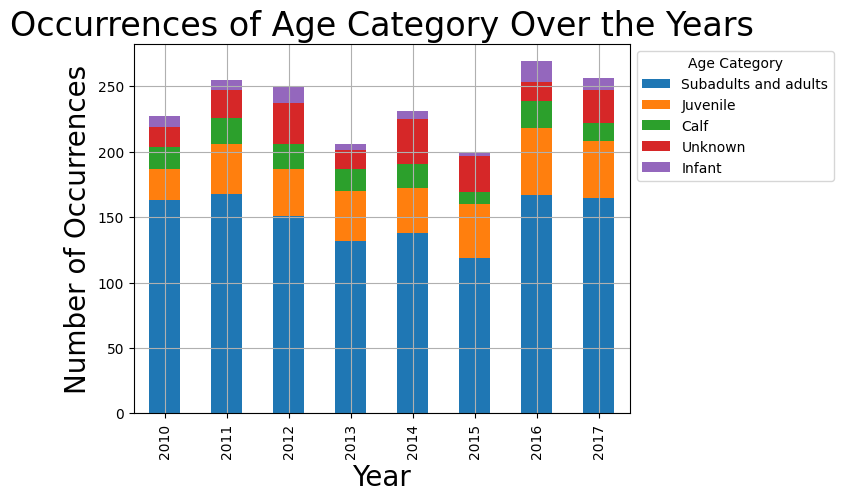

In [44]:
# Set 'D/S Office' as index
Age_df.set_index('Age Category', inplace=True)

# Create a stacked bar plot
plt.figure(figsize=(30, 18))
ax = Age_df.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.title('Occurrences of Age Category Over the Years', fontsize=24)

# Move the legend outside the plot to the right
ax.legend(title='Age Category', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Display the plot
plt.grid(True)
#plt.tight_layout()  # Ensures the legend fits within the plot area
plt.show()

In [46]:
df=pd.read_csv(r'..\..\data\cleaned_data\cancat.csv')

In [47]:
df

No                 Region      District      D/S Office Date of Death  \
0        1               Southern    Monaragala      Kataragama    2010-01-01   
1        2               Southern    Monaragala    Thanamalvila    2010-01-07   
2        3          North Western  Anuradhapura         Unknown    2010-01-08   
3        4                Eastern        Ampara     Thirikkovil    2010-01-12   
4        5          North Western    Kurunegala       Ipologama    2010-01-15   
...    ...                    ...           ...             ...           ...   
1889  1890  Elephant Transit Home     Ratnapura         Unknown    2017-12-28   
1890  1891               Southern     Ratnapura      Weligepola    2017-12-28   
1891  1892           Anuradhapura  Anuradhapura  Kabithigollawa    2017-12-28   
1892  1893            Trincomalee   Trincomalee        Kanthale    2017-12-29   
1893  1894                Central       Badulla     Mahiyangana    2017-12-31   

      Cause of Death      Sex      Age          Age Category  
0     Body destroyed     Male    50-55  Subadults and adults  
1            Unknown     Male       20  Subadults and adults  
2       Electrocuted     Male    30-35  Subadults and adults  
3            Gunshot   Female    15-20  Subadults and adults  
4           Accident     Male        5              Juvenile  
...              ...      ...      ...                   ...  
1889         Natural   Female  Unknown               Unknown  
1890  Body destroyed     Male       25  Subadults and adults  
1891  Body destroyed   Female       20  Subadults and adults  
1892    Electrocuted  Unknown    25-30  Subadults and adults  
1893      Hakkapatas     Male  Unknown               Unknown  

[1894 rows x 9 columns]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   No              1894 non-null   int64 
 1   Region          1894 non-null   object
 2   District        1894 non-null   object
 3   D/S Office      1894 non-null   object
 4   Date of Death   1894 non-null   object
 5   Cause of Death  1894 non-null   object
 6   Sex             1894 non-null   object
 7   Age             1894 non-null   object
 8   Age Category    1894 non-null   object
dtypes: int64(1), object(8)
memory usage: 133.3+ KB


In [49]:
# Calculate summary statistics for numerical columns
numerical_summary = df.describe()

# Calculate frequency counts for categorical columns
categorical_summary = df.select_dtypes(include=['object']).apply(pd.Series.value_counts)

# Print the summary statistics
print("Summary Statistics for Numerical Columns:")
print(numerical_summary)

print("\nSummary Statistics for Categorical Columns:")
print(categorical_summary)


Summary Statistics for Numerical Columns:
                No
count  1894.000000
mean    947.500000
std     546.895023
min       1.000000
25%     474.250000
50%     947.500000
75%    1420.750000
max    1894.000000

Summary Statistics for Categorical Columns:
               Region  District  D/S Office  Date of Death  Cause of Death  \
 20-25            NaN       NaN         NaN            NaN             NaN   
 5 - 6            NaN       NaN         NaN            NaN             NaN   
 8 - 10           NaN       NaN         NaN            NaN             NaN   
0.5 Months        NaN       NaN         NaN            NaN             NaN   
01                NaN       NaN         NaN            NaN             NaN   
...               ...       ...         ...            ...             ...   
serunuwara        NaN       NaN         4.0            NaN             NaN   
siyabalanduwa     NaN       NaN         2.0            NaN             NaN   
unknown           NaN       NaN         

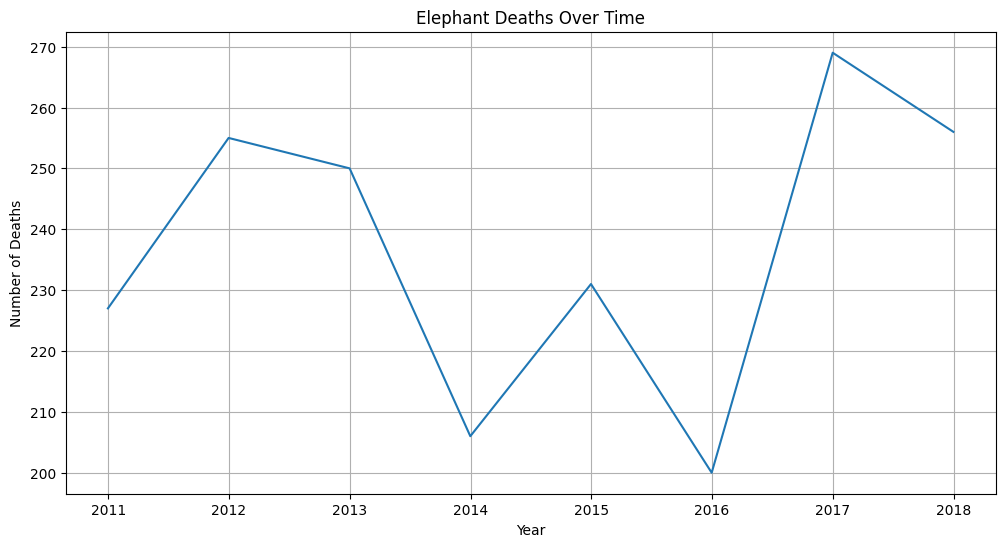

In [50]:
df['Date of Death'] = pd.to_datetime(df['Date of Death'])

# Set the 'Date of Death' column as the index for time series analysis
DF=df.set_index('Date of Death', inplace=False)

# Resample the data to get the count of elephant deaths by year
elephant_deaths_by_year = DF['No'].resample('Y').count()

# Plot the time series of elephant deaths over the years
plt.figure(figsize=(12, 6))
plt.plot(elephant_deaths_by_year)
plt.title('Elephant Deaths Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()


+ Convert the 'Date of Death' column to a datetime format and set it as the index for time series analysis.
+ Resample the data to get the count of elephant deaths by year.
+ Plot the time series of elephant deaths over the years.

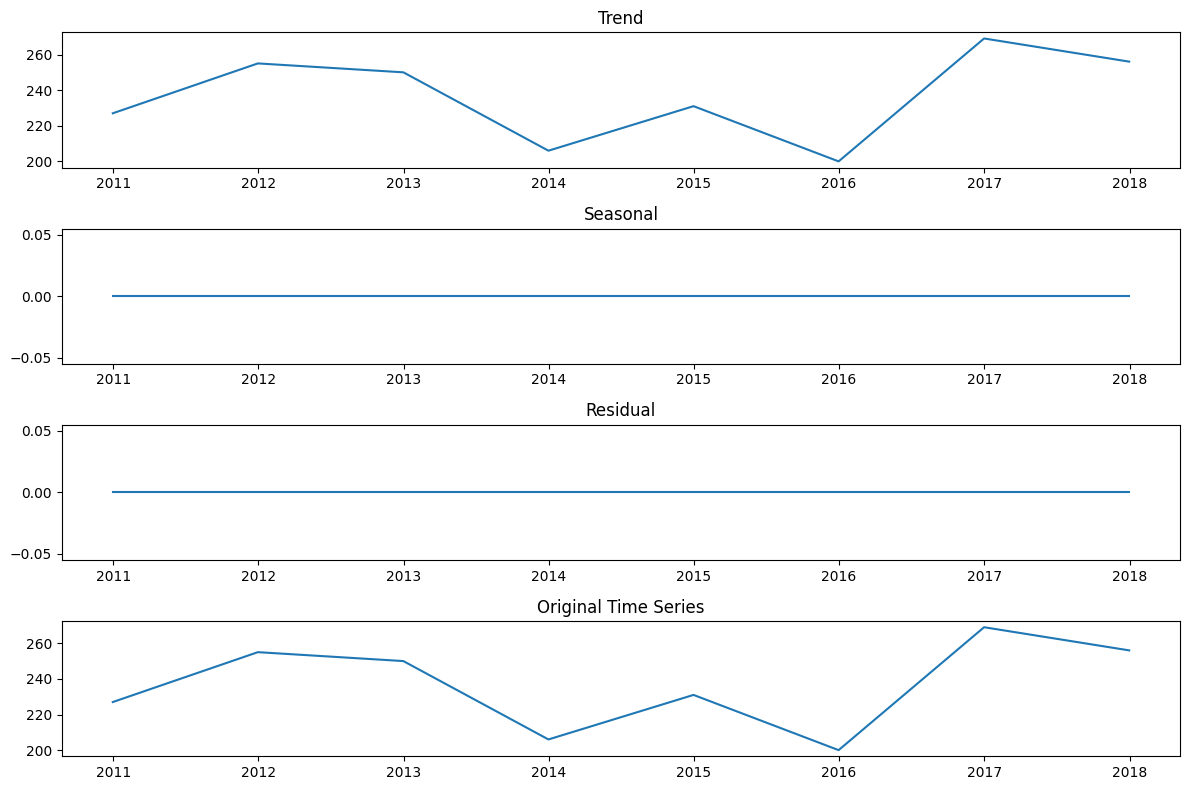

In [53]:
# Decompose the time series to identify trends and seasonality
decomposition = seasonal_decompose(elephant_deaths_by_year, model='additive')

# Plot the decomposed components (trend, seasonal, and residual)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(412)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(413)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.subplot(414)
plt.plot(elephant_deaths_by_year)
plt.title('Original Time Series')
plt.tight_layout()
plt.show()

+ Decompose the time series into trend, seasonal, and residual components using seasonal decomposition.
+ Plot the decomposed components to visualize any underlying patterns.

+ By resampling data at a monthly frequency,  can better capture any monthly seasonality patterns, trends, or variations in elephant deaths

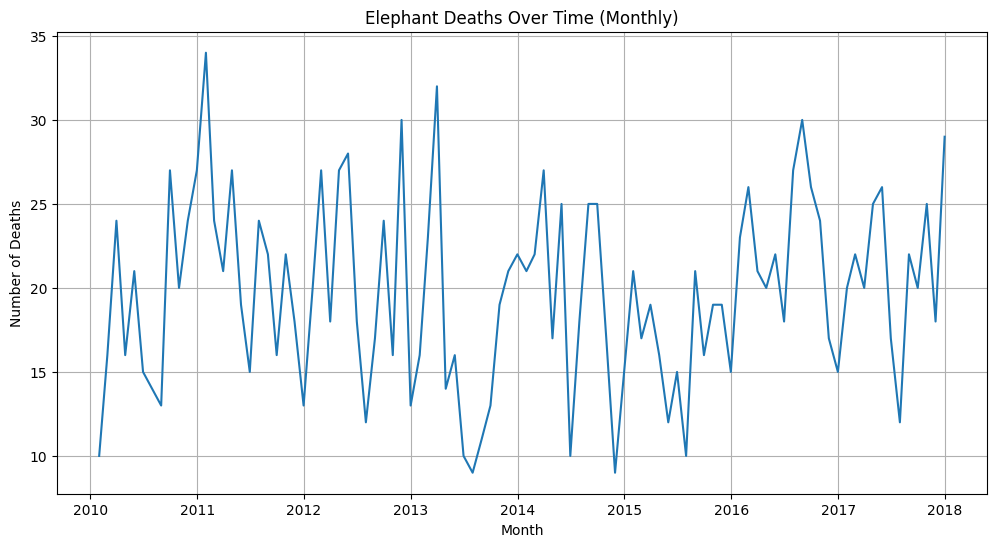

In [54]:
# Resample the data to get the count of elephant deaths by month
elephant_deaths_by_month = DF['No'].resample('M').count()

# Plot the time series of elephant deaths over the months
plt.figure(figsize=(12, 6))
plt.plot(elephant_deaths_by_month)
plt.title('Elephant Deaths Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()




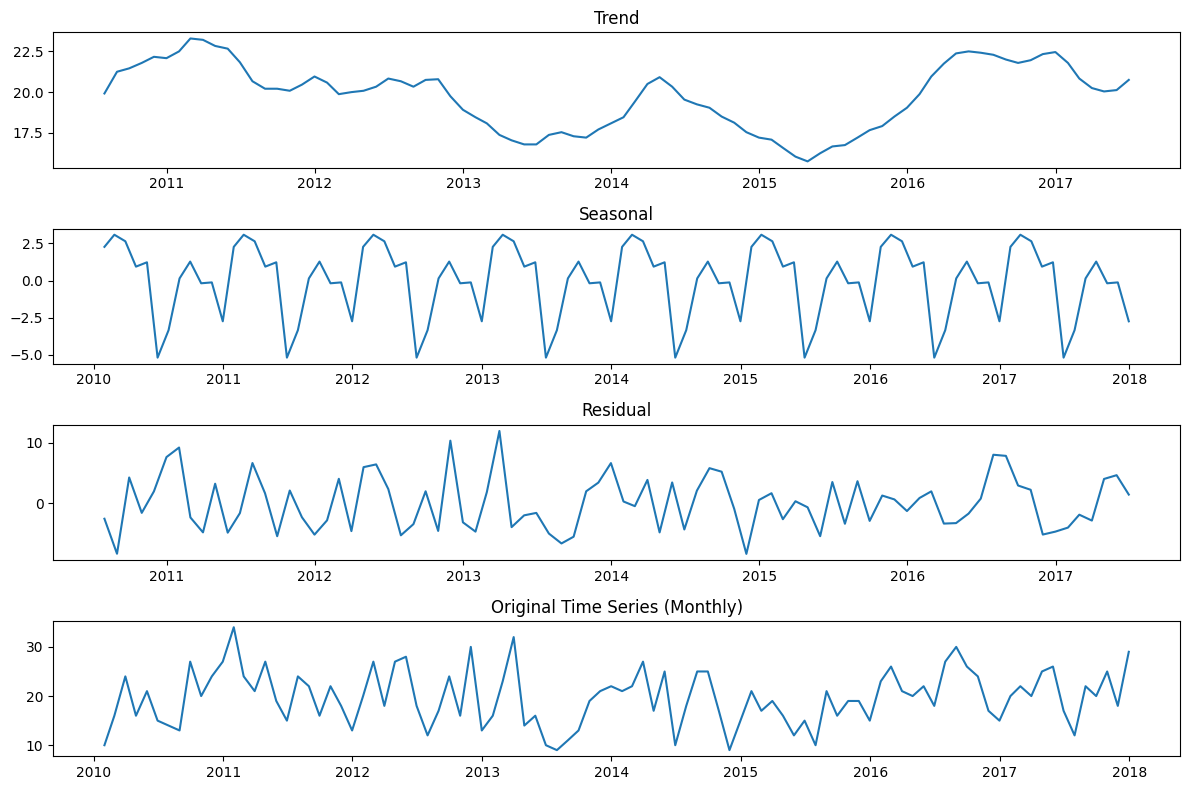

In [55]:
# Decompose the time series with monthly granularity
decomposition = seasonal_decompose(elephant_deaths_by_month, model='additive')

# Plot the decomposed components (trend, seasonal, and residual) for the monthly data
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(412)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(413)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.subplot(414)
plt.plot(elephant_deaths_by_month)
plt.title('Original Time Series (Monthly)')
plt.tight_layout()
plt.show()

## Mapping the district map

In [60]:
# Load Sri Lankan district boundaries
districts = gpd.read_file(r'..\..\data\Map_file\District_geo.json')

In [62]:
df[df['District']=='Unknown']

No         Region District D/S Office Date of Death Cause of Death  \
30  31  North Western  Unknown    Unknown    2010-03-08        Poisned   
41  42  North Western  Unknown    Unknown    2010-03-21       Accident   

       Sex    Age          Age Category  
30    Male  25-30  Subadults and adults  
41  Female     15  Subadults and adults

In [63]:
districts.head(2)

ADM2_EN            ADM2_SI                ADM2_TA ADM2_PCODE ADM2_REF  \
0  [unknown]          [unknown]  [unknoபுத்தளம் மாவட்ட       LK60            
1     Ampara  අම්පාර දිස්ත්‍රික       அம்பாறை மாவட்டம்       LK52            

  ADM2ALT1EN ADM2ALT2EN ADM2ALT1SI ADM2ALT2SI ADM2ALT1TA  ...    ADM0_EN  \
0                                                         ...  Sri Lanka   
1                                                         ...  Sri Lanka   

      ADM0_SI ADM0_TA ADM0_PCODE Shape_Leng Shape_Area  \
0  ශ්‍රී ලංකා  இலங்கை         LK   0.286741   0.002137   
1  ශ්‍රී ලංකා  இலங்கை         LK   5.397133   0.366562   

                       date                   validOn  \
0 2019-03-04 00:00:00+00:00 2020-03-05 00:00:00+00:00   
1 2019-03-04 00:00:00+00:00 2020-03-05 00:00:00+00:00   

                    validTo                                           geometry  
0 1899-11-30 00:00:00+00:00  POLYGON ((79.82493 7.78566, 79.82341 7.78844, ...  
1 1899-11-30 00:00:00+00:00  POLYGON ((81.75144 7.45764, 81.74739 7.45469, ...  

[2 rows x 25 columns]

In [64]:
# Rename the district column to 'District'
districts.rename(columns={'ADM2_EN': 'District'}, inplace=True)

In [65]:
# Remove the 'unknown' district
districts = districts[districts['District'] != '[unknown]']

In [66]:
# Group by 'District' and count the number of elephant deaths in each district
elephant_deaths_by_district = df['District'].value_counts().reset_index()
elephant_deaths_by_district.columns = ['District', 'ElephantDeaths']

In [67]:
elephant_deaths_by_district

District  ElephantDeaths
0   Anuradhapura             281
1    Polonnaruwa             279
2         Ampara             258
3    Trincomalee             217
4     Monaragala             197
5     Kurunegala              99
6     Hambantota              91
7     Batticaloa              91
8       Puttalam              81
9      Ratnapura              67
10      Vavuniya              54
11       Badulla              49
12        Matale              44
13        Mannar              44
14    Mullaitivu              17
15         Kandy              12
16  Nuwara Eliya               8
17   Kilinochchi               3
18       Unknown               2

In [68]:
# Merge the data with district boundaries data
merged_data = districts.merge(elephant_deaths_by_district, on='District', how='left')

In [69]:
merged_data.head(2)

District            ADM2_SI            ADM2_TA ADM2_PCODE ADM2_REF  \
0        Ampara  අම්පාර දිස්ත්‍රික   அம்பாறை மாவட்டம்       LK52            
1  Anuradhapura  අනුරාධපුර දිස්ත්‍  அனுராதபுரம் மாவட்       LK71            

  ADM2ALT1EN ADM2ALT2EN ADM2ALT1SI ADM2ALT2SI ADM2ALT1TA  ...     ADM0_SI  \
0                                                         ...  ශ්‍රී ලංකා   
1                                                         ...  ශ්‍රී ලංකා   

  ADM0_TA ADM0_PCODE Shape_Leng Shape_Area                      date  \
0  இலங்கை         LK   5.397133   0.366562 2019-03-04 00:00:00+00:00   
1  இலங்கை         LK   4.539544   0.592676 2019-03-04 00:00:00+00:00   

                    validOn                   validTo  \
0 2020-03-05 00:00:00+00:00 1899-11-30 00:00:00+00:00   
1 2020-03-05 00:00:00+00:00 1899-11-30 00:00:00+00:00   

                                            geometry  ElephantDeaths  
0  POLYGON ((81.75144 7.45764, 81.74739 7.45469, ...           258.0  
1  POLYGON ((80.93922 8.34202, 80.93707 8.34614, ...           281.0  

[2 rows x 26 columns]

In [70]:
# Fill NaN values with 0 for districts with no recorded elephant deaths
merged_data['ElephantDeaths'].fillna(0, inplace=True)

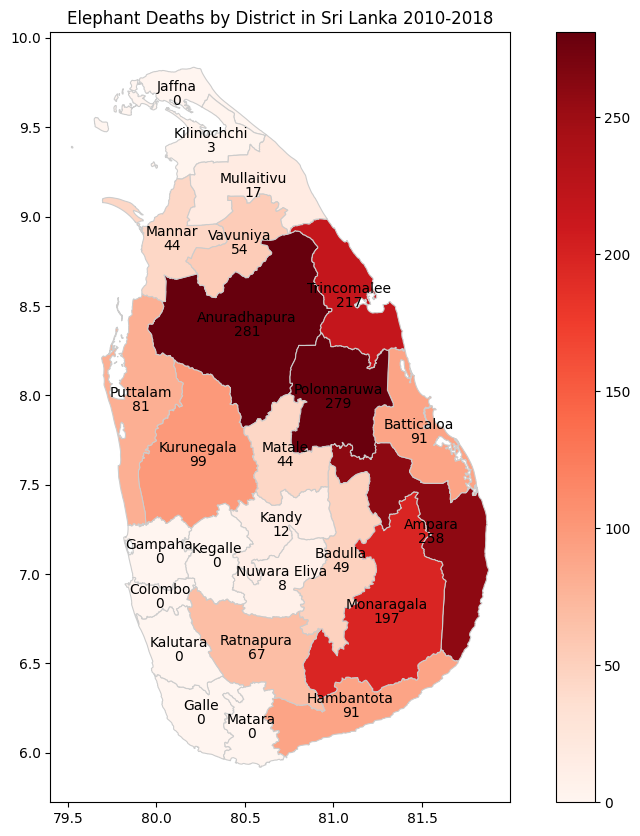

In [71]:
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map 
merged_data.plot(column='ElephantDeaths', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

# Add district names as labels with an offset above the district boundary
merged_data.apply(lambda x: ax.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center', va='bottom'), axis=1)

# Add the number of deaths as labels with an offset below the district boundary
merged_data.apply(lambda x: ax.annotate(text=str(int(x['ElephantDeaths'])), xy=x.geometry.centroid.coords[0], ha='center', va='top'), axis=1)

# Add a title
plt.title('Elephant Deaths by District in Sri Lanka 2010-2018')

# Show the map
plt.show()

In [72]:
from ipywidgets import interact, widgets
from IPython.display import display, clear_output

# Function to update the map based on the selected year
def update_map(year):
    # Clear the previous output
    clear_output(wait=True)
    
    # Load your elephant deaths data for the selected year
    data_path = f'D:/UOP/4th year/Research/EDA/Data/{year}_clean.csv'
    df = pd.read_csv(data_path)

    # Group by 'District' and count the number of elephant deaths in each district
    elephant_deaths_by_district = df['District'].value_counts().reset_index()
    elephant_deaths_by_district.columns = ['District', 'ElephantDeaths']

    # Merge the data with district boundaries data
    merged_data = districts.merge(elephant_deaths_by_district, on='District', how='left')

    # Fill NaN values with 0 for districts with no recorded elephant deaths
    merged_data['ElephantDeaths'].fillna(0, inplace=True)

    # Set up the plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))

    # Plot the map 
    merged_data.plot(column='ElephantDeaths', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

    # Add district names as labels with an offset above the district boundary
    merged_data.apply(lambda x: ax.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center', va='bottom'), axis=1)

    # Add the number of deaths as labels with an offset below the district boundary
    merged_data.apply(lambda x: ax.annotate(text=str(int(x['ElephantDeaths'])), xy=x.geometry.centroid.coords[0], ha='center', va='top'), axis=1)

    # Add a title
    plt.title(f'Elephant Deaths by District in Sri Lanka {year}')

    # Show the map in the notebook
    plt.show()

# Create a slider widget for selecting the year
year_slider = widgets.IntSlider(value=2010, min=2010, max=2017, step=1, description='Year')

# Connect the slider to the update_map function using interact
interact(update_map, year=year_slider)


interactive(children=(IntSlider(value=2010, description='Year', max=2017, min=2010), Output()), _dom_classes=(…

<function __main__.update_map(year)>